# Micro-Credit Defaulter Model
##### Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
# Loading dataset
df = pd.read_csv('Data File.csv')
pd.set_option("display.max_columns",None)

In [3]:
# Reading 5 head rows
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
# Reading 5 tails rows
df.tail(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


###### By observing the head and tail rows we find that column "Unnamed: 0" is just the serial number. So we can drop it.

In [5]:
# Checking the shape of our data
print("Micro-Credit dataset contains {} rows and {} columns.".format(len(df),len(df.columns)))

Micro-Credit dataset contains 209593 rows and 37 columns.


In [6]:
# Dropping unnecessary column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
# checking columns 
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

###### Attributes information
label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn: mobile number of user

aon: age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date

In [8]:
# Checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

###### Observations:-
We can observe that there are 3 types of data -
1. float64 - 21columns
2. int64 - 12columns
3. object - 3columns

### Exploratory Data Analysis

In [9]:
# Checking null values
if df.isnull().sum().any()==True:
    print("Null values present in dataset.")
else:
    print("No null values in dataset.")

No null values in dataset.


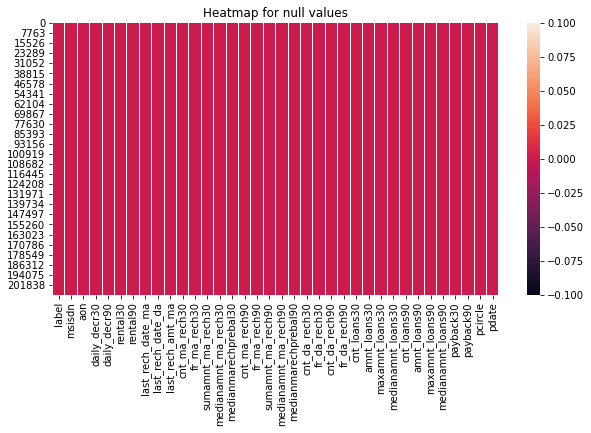

In [10]:
# Using heatmap for null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title("Heatmap for null values")
plt.show()

###### Heatmap confirms that there are no null values.

In [11]:
# checking duplicates values
if df.duplicated().sum().any()==True:
    print("Duplicate values present in dataset.")
else:
    print("No duplicate values in datset.")

Duplicate values present in dataset.


In [12]:
df.duplicated().sum()

1

###### 1 dupicate value present in dataset.

In [13]:
# Removing duplicate value
df.drop_duplicates(inplace=True,keep='first')

In [14]:
# Checking shape
df.shape

(209592, 36)

In [15]:
# checking statistic summary
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,3712.220632,2064.458973,3.978053,3737.372947,7704.496570,1812.819258,3851.945862,6.315437,7.716812,12396.236149,1864.597375,92.025522,262.579362,3749.512336,0.041495,0.045713,2.758975,17.951992,274.660029,0.054029,18.520988,23.645397,6.703138,0.046078,3.398639,4.321302
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,53374.960145,2370.790003,4.256099,53643.752523,10139.645685,2070.869474,54006.502647,7.193487,12.590273,16857.832129,2081.685508,369.216539,4183.907920,53885.542905,0.397557,0.951388,2.554507,17.379778,4245.274734,0.218039,224.797957,26.469924,2.103869,0.200692,8.813330,10.307791
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


###### Observations:-
1. Label is our target feature, which is ordinal in nature having values` 0` and `1`,but the mean and median are greater than .5 showing that there is `imbalance` of data in target varaible.
2. All features are having `mean greater than median` ,it shows that data is not normally distributed.
3. Standard deviation is also very high in many features.
4. Some features like `aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, medianmarechprebal30, medianmarechprebal90` are showing negative values in lowest percentile which can't be realistic. We should treat them accordingly.
5. A high difference in the 75th percentile and 100th percentile of many features, shows the presence of `outliers`. 

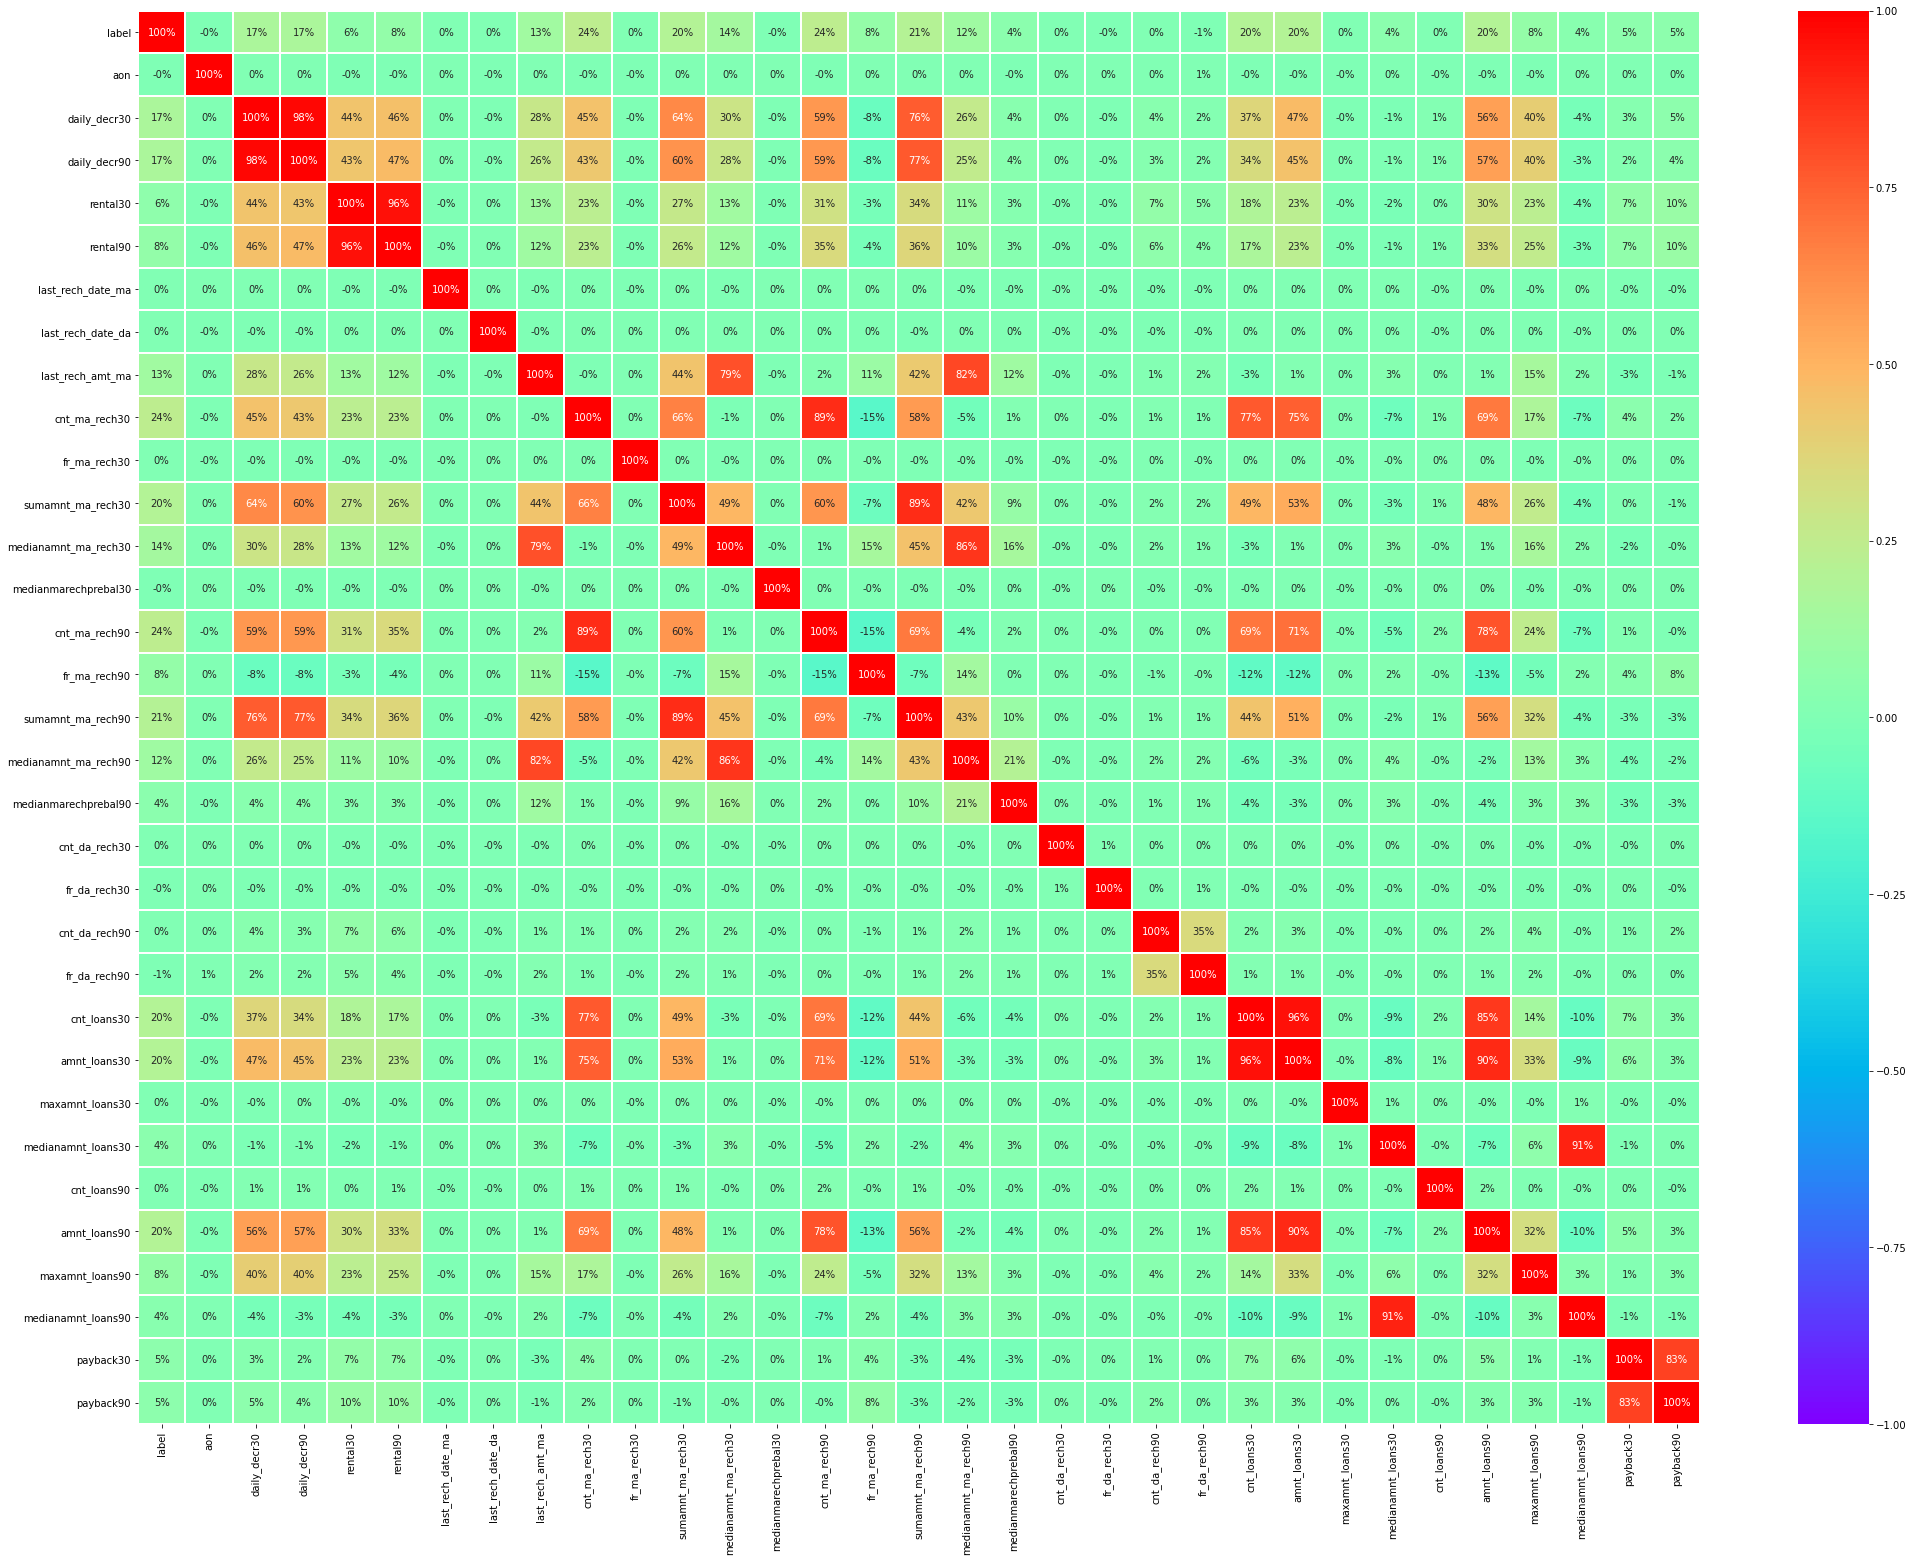

In [16]:
# checking the correlation
plt.figure(figsize=(35,26))
sns.heatmap(df.corr(),cmap='rainbow',annot=True,fmt="0.0%",vmin=-1,
            vmax=1, center= 0 ,linewidths=1, linecolor='white')

###### Obsservations :-
1. Seeing the correlation graph we can say that there is less correlation of any independent feature with target feature, rather than this there are more cases in which there is high correlation between independent features. This will create problem of multicollinearity.

2. `payback30` and `payback90` having high correlation.

3.  `medianamount_loan30` and `medianamount_loan90` also having high correaltion.

4. `amnt_loan30` and `ont_loan30` having highest correlation.

5. `dailydecr30` and `dailydecr90` also with highest correlation with 98% dependence.

6. Any many more features ahving correlation .These will create multicollinearity in our model . They need to be treated.

In [17]:
# Checking the number of unique values
for i in df.columns:
    print(i,"~~~~>",len(df[i].unique()),"unique values")

label ~~~~> 2 unique values
msisdn ~~~~> 186243 unique values
aon ~~~~> 4507 unique values
daily_decr30 ~~~~> 147026 unique values
daily_decr90 ~~~~> 158670 unique values
rental30 ~~~~> 132148 unique values
rental90 ~~~~> 141033 unique values
last_rech_date_ma ~~~~> 1186 unique values
last_rech_date_da ~~~~> 1174 unique values
last_rech_amt_ma ~~~~> 70 unique values
cnt_ma_rech30 ~~~~> 71 unique values
fr_ma_rech30 ~~~~> 1083 unique values
sumamnt_ma_rech30 ~~~~> 15141 unique values
medianamnt_ma_rech30 ~~~~> 510 unique values
medianmarechprebal30 ~~~~> 30428 unique values
cnt_ma_rech90 ~~~~> 110 unique values
fr_ma_rech90 ~~~~> 89 unique values
sumamnt_ma_rech90 ~~~~> 31771 unique values
medianamnt_ma_rech90 ~~~~> 608 unique values
medianmarechprebal90 ~~~~> 29785 unique values
cnt_da_rech30 ~~~~> 1066 unique values
fr_da_rech30 ~~~~> 1072 unique values
cnt_da_rech90 ~~~~> 27 unique values
fr_da_rech90 ~~~~> 46 unique values
cnt_loans30 ~~~~> 40 unique values
amnt_loans30 ~~~~> 48 uni

###### From above ,we observe that pcircle having single unique values we can drop this column. While we are going to manipulate pdate column.

# Data-Preprocessing

In [18]:
# Dropping columns with high collinearity among independent columns.
df.drop(['rental30','daily_decr30','amnt_loans30','medianamnt_loans30'],axis=1,inplace=True)

In [19]:
# Dropping columns which are contributing 0% effect on the dependnet and independent feautres.
df.drop(['aon','fr_ma_rech30','last_rech_date_ma','last_rech_date_da','cnt_da_rech30','fr_da_rech30','maxamnt_loans30','medianmarechprebal30'],inplace=True,axis=1)

In [20]:
# we find that pdate column is not giving us useful information.So we dropping this column
df.drop(['pdate'],axis=1,inplace=True)

In [21]:
# Also dropping msisdin as it represents the unique phone numbers only.
df.drop(['msisdn'],axis=1,inplace=True)

In [22]:
# Data left
print("Now we have Rows ~~>",len(df),"\nand Columns ~~>",len(df.columns))

Now we have Rows ~~> 209592 
and Columns ~~> 22


## Data Visualization

Percentage of non-defaulter customers - 87.5 %
Percentage of defaulter customers - 12.5 %


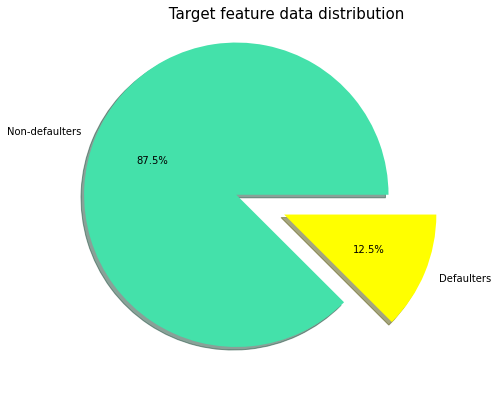

In [23]:
# Checking target feature distribution
print("Percentage of non-defaulter customers - {}".format(round(df[df['label']==1].shape[0]/df['label'].shape[0]*100,1)),"%")
print("Percentage of defaulter customers - {}".format(round(df[df['label']==0].shape[0]/df['label'].shape[0]*100,1)),"%")

# Plotting graph for target feature distribution 
plt.figure(figsize=(7,7))
plt.pie([len(df[df['label']==1]),len(df[df['label']==0])],labels=["Non-defaulters","Defaulters"], autopct='%2.1f%%', colors = ['#44e1aa','yellow'],explode=(0.34,0),shadow=True)
plt.title(" Target feature data distribution",fontsize=15)
plt.show()

###### From the graph ,we observed that we have imbalanced target feature.
* 87.5% of data is composed of non-defaulters while only 12.5% of data is present for defaulters.

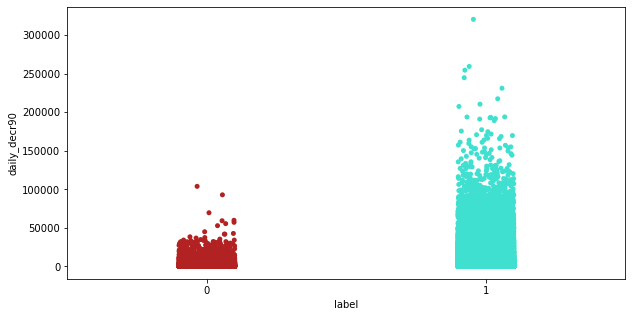

In [24]:
# Using stripplot for daily_decr90 feature.

plt.figure(figsize=(10,5))
sns.stripplot(x=df['label'],y=df['daily_decr90'],data=df,palette=['firebrick','turquoise'])

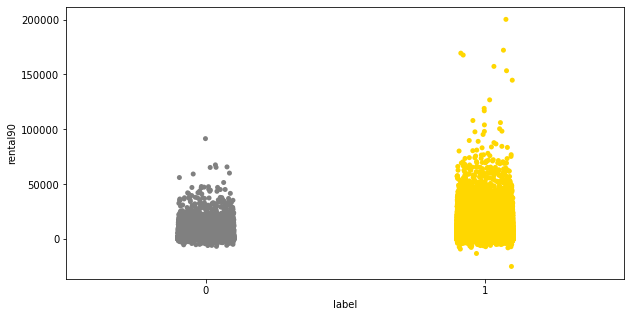

In [25]:
# Using stripplot for rental90 feature
plt.figure(figsize=(10,5))
sns.stripplot(x=df['label'],y=df['rental90'],data=df,palette=['grey','gold'])
# Presence of negative average main account balance,while most of accounts have balance between 0-50000.

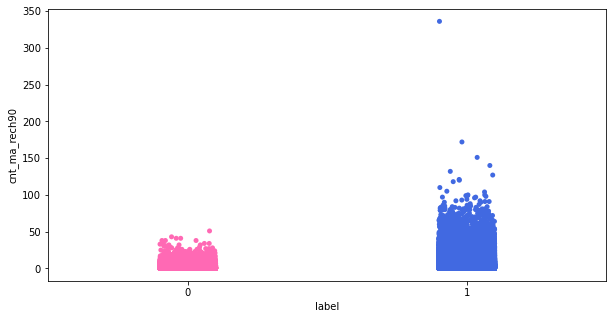

In [26]:
# Using stripplot for cnt_ma_rech90 feature
plt.figure(figsize=(10,5))
sns.stripplot(x=df['label'],y=df['cnt_ma_rech90'],data=df,palette=['hotpink','royalblue'])
# Outliers present 

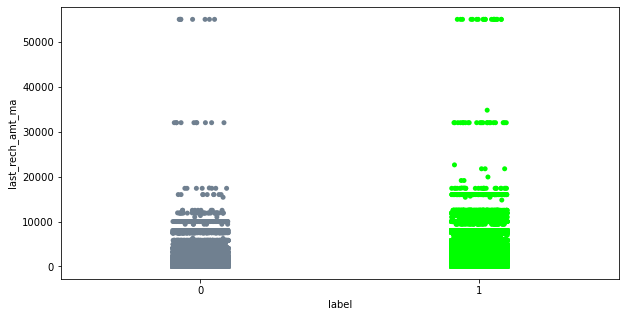

In [27]:
# Using stripplot for label and last_rech_amt_ma features
plt.figure(figsize=(10,5))
sns.stripplot(x=df['label'],y=df['last_rech_amt_ma'],data=df,palette=['slategray','lime'])
# too much variance in feature distribution

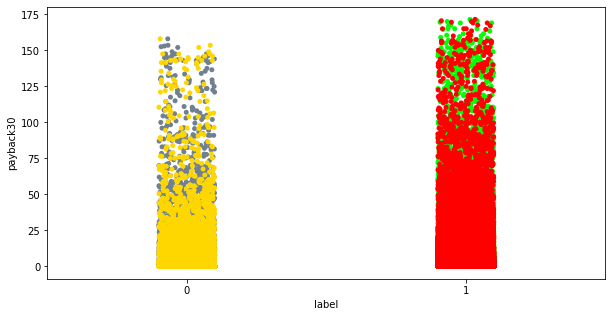

In [28]:
# Plotting stripplot for label and payback90, payback30 features.
plt.figure(figsize=(10,5))
sns.stripplot(x=df['label'],y=df['payback90'],data=df,palette=['slategray','lime'])
sns.stripplot(x=df['label'],y=df['payback30'],data=df,palette=['gold','red'])
# Distribution of payback30 and payback90 features is same.

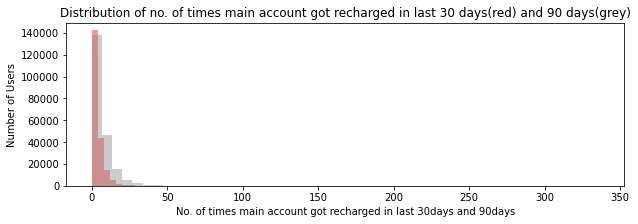

In [29]:
# Plotting data distributin graph
f=plt.figure(figsize=(10,3))

f.add_subplot()
sns.distplot(df['cnt_ma_rech30'],color='red',kde=False)

f.add_subplot()
sns.distplot(df['cnt_ma_rech90'],color='grey',kde=False)
plt.xlabel("No. of times main account got recharged in last 30days and 90days")
plt.ylabel('Number of Users')
plt.title("Distribution of no. of times main account got recharged in last 30 days(red) and 90 days(grey)")
plt.show()

Maximun number of times main account got recharged ranging between 0-15.

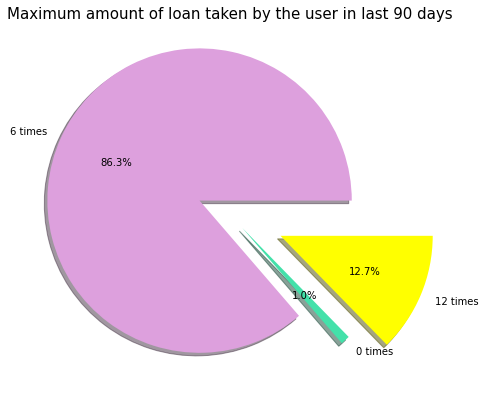

In [30]:
# checking the distribution of maximum amount of loans taken by users 
plt.figure(figsize=(7,7))
plt.pie([len(df[df['maxamnt_loans90']==6]),len(df[df['maxamnt_loans90']==0]),len(df[df['maxamnt_loans90']==12])],labels=["6 times","0 times","12 times"], autopct='%2.1f%%', colors = ['plum','#44e1aa','yellow'],explode=(0.22,0.12,0.36),shadow=True)
plt.title("Maximum amount of loan taken by the user in last 90 days",fontsize=15)
plt.show()

* 86.3% of customers are with 6 times of loans.
* 12.7% of customers are with 12 times of loans.
* While only 1% customers are those who are having zero times of loan.

# Feature - Engineering

## Daily_decr90 Feature

In [31]:
# Checking daily_decr90 feature percentiles
df['daily_decr90'].describe()

count    209592.000000
mean       6082.529123
std       10918.836919
min         -93.012667
25%          42.691917
50%        1500.000000
75%        7802.795000
max      320630.000000
Name: daily_decr90, dtype: float64

label                          0          1
daily_decr90_category                      
Below 10               46.065655  53.934345
Bet 10-10000           10.556518  89.443482
High Amount             1.387449  98.612551


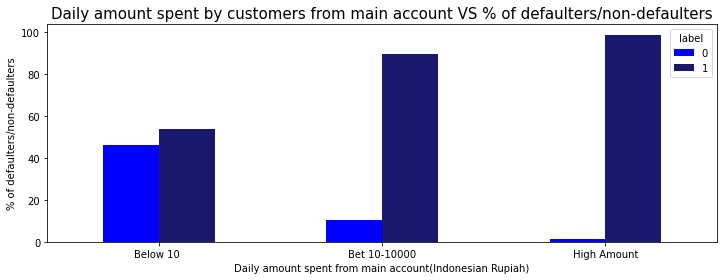

In [32]:
# Converting into different categories and plotting bivariate graph for cheking distribution
daily_categories=[(df['daily_decr90']<10),df['daily_decr90'].between(0,10000),(df['daily_decr90']>10000)]
daily_values=["Below 10 ","Bet 10-10000","High Amount"]
df['daily_decr90_category']=np.select(daily_categories,daily_values)
df['daily_decr90_category'].value_counts()

# Creating crosstable
daily_categorycrosstab=pd.crosstab(df['label'],df['daily_decr90_category']).apply(lambda x:x/x.sum()*100)
daily_categorycrosstab=daily_categorycrosstab.transpose()

# Plotting graph
daily_categorycrosstab.plot(kind='bar',color=['blue','midnightblue'],figsize=(12,4))
print(daily_categorycrosstab)
style.use("ggplot")
plt.xlabel("Daily amount spent from main account(Indonesian Rupiah)")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters/non-defaulters")
plt.title("Daily amount spent by customers from main account VS % of defaulters/non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* 46% defaulters are present among those who are spending averge daily amount below 10(Indonesian Rupiah).
* 10% defaulters are present among those who are spending averge daily amount between 10-10000(Indonesian Rupiah).
* While those who are spending high amount are having very less percentage of defaulters.
###### Above observations suggests that defaulters are present in those who are spending daily average of less amount.

## Rental90 Feature

In [33]:
# Checking rental90 feature percentiles
df['rental90'].describe()

count    209592.000000
mean       3483.407309
std        5770.475034
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.792500
max      200148.110000
Name: rental90, dtype: float64

label                              0          1
rental90_category                              
Average balance            10.707309  89.292691
High balance                8.193727  91.806273
Low balance                14.667505  85.332495
Zero or negative balance   31.664980  68.335020


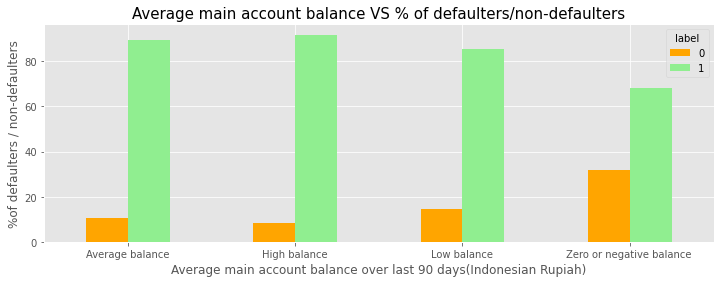

In [34]:
# Converting into different categories and plotting bivariate graph for cheking distribution
rental_categories=[(df['rental90']<=0),df['rental90'].between(0,500),df['rental90'].between(500,5000),(df['rental90']>5000)]
rental_values=["Zero or negative balance ","Low balance","Average balance","High balance"]
df['rental90_category']=np.select(rental_categories,rental_values)
df['rental90_category'].value_counts()

# Creating crosstable
rental_categorycrosstab=pd.crosstab(df['label'],df['rental90_category']).apply(lambda x:x/x.sum()*100)
rental_categorycrosstab=rental_categorycrosstab.transpose()

# Plotting graph
rental_categorycrosstab.plot(kind='bar',color=['orange','lightgreen'],figsize=(12,4))
print(rental_categorycrosstab)
style.use("ggplot")
plt.xlabel("Average main account balance over last 90 days(Indonesian Rupiah)")
plt.xticks(rotation=0)
plt.ylabel("%of defaulters / non-defaulters")
plt.title("Average main account balance VS % of defaulters/non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* 31% of zero or negative main account balance users are defaulters.
* While only 8% of high main account balance users are defaulters.
###### More defaulters are present where users are having zero/negative balance or low balance.

## last_rech_amt_ma   Feature

In [35]:
# Checking last_rech_amt_ma feature descripiton
df['last_rech_amt_ma'].describe()

count    209592.000000
mean       2064.458973
std        2370.790003
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

label                              0          1
last_rech_amt_ma_category                      
Average amount              7.516345  92.483655
High amount                 5.134957  94.865043
Low amount                 42.937050  57.062950
Medium amount              11.854239  88.145761


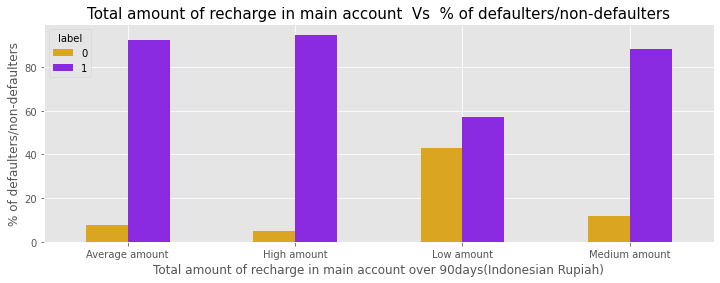

In [36]:
# Creating different cataegories 
last_rech_amt_ma_categories=[(df['last_rech_amt_ma']<=500),df['last_rech_amt_ma'].between(500,1000),df['last_rech_amt_ma'].between(1000,10000),(df['last_rech_amt_ma']>10000)]
last_rech_amt_ma_values=["Low amount","Medium amount","Average amount","High amount"]
df['last_rech_amt_ma_category']=np.select(last_rech_amt_ma_categories,last_rech_amt_ma_values)
df['last_rech_amt_ma_category'].value_counts()

# Creating crossatable
last_rech_amt_ma_categorycrosstab=pd.crosstab(df['label'],df['last_rech_amt_ma_category']).apply(lambda x:x/x.sum()*100)
last_rech_amt_ma_categorycrosstab=last_rech_amt_ma_categorycrosstab.transpose()

# Plotting graph
last_rech_amt_ma_categorycrosstab.plot(kind='bar',color=["goldenrod",'blueviolet'],figsize=(12,4))
print(last_rech_amt_ma_categorycrosstab)
style.use("ggplot")
plt.xlabel("Total amount of recharge in main account over 90days(Indonesian Rupiah)")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters/non-defaulters")
plt.title("Total amount of recharge in main account  Vs  % of defaulters/non-defaulters",fontsize=15)
plt.show()

###### Observations:-

* 42% of Users who are having low amount of recharge are defaulters.

## Sumamnt_ma_rech90 Feature

In [37]:
# Checking sumamnt_ma_rech90 feature description
df['sumamnt_ma_rech90'].describe()

count    209592.000000
mean      12396.236149
std       16857.832129
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

label                               0          1
sumamnt_ma_rech90_category                      
Average amount              12.262114  87.737886
High amount                  2.413657  97.586343
Low amount                  43.070520  56.929480
Medium amount               32.967480  67.032520


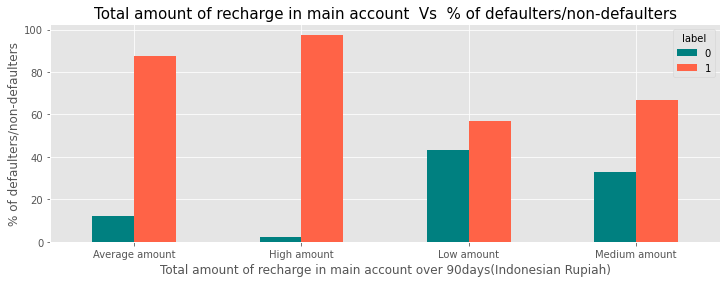

In [38]:
# Creating different categories for sumamnt_ma_rech90
sumamnt_categories=[(df['sumamnt_ma_rech90']<=500),df['sumamnt_ma_rech90'].between(500,1000),df['sumamnt_ma_rech90'].between(1000,10000),(df['sumamnt_ma_rech90']>10000)]
sumamnt_values=["Low amount","Medium amount","Average amount","High amount"]
df['sumamnt_ma_rech90_category']=np.select(sumamnt_categories,sumamnt_values)
df['sumamnt_ma_rech90_category'].value_counts()

# Creating cross table
sumamnt_categorycrosstab=pd.crosstab(df['label'],df['sumamnt_ma_rech90_category']).apply(lambda x:x/x.sum()*100)
sumamnt_categorycrosstab=sumamnt_categorycrosstab.transpose()

# Plotting graph
sumamnt_categorycrosstab.plot(kind='bar',color=["teal",'tomato'],figsize=(12,4))
print(sumamnt_categorycrosstab)
style.use("ggplot")
plt.xlabel("Total amount of recharge in main account over 90days(Indonesian Rupiah)")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters/non-defaulters")
plt.title("Total amount of recharge in main account  Vs  % of defaulters/non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* 43% of low amount of recharge in main account are defaulters.
* 32% of median amount of recharge upto 1000(Indonesian Rupiah) are defaulters.
###### Recharge of main account below 1000(Indonesian Rupiah) are having maximum cases of defaulters.

## medianamnt_ma_rech90  Feature

In [39]:
# Checking medianamnt_ma_rech90 feature descripition
df['medianamnt_ma_rech90'].describe()

count    209592.000000
mean       1864.597375
std        2081.685508
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

label                                  0          1
medianamnt_ma_rech90_category                      
Average amount                  7.733945  92.266055
High amount                     8.290686  91.709314
Low amount                     41.367237  58.632763
Medium amount                  11.340157  88.659843


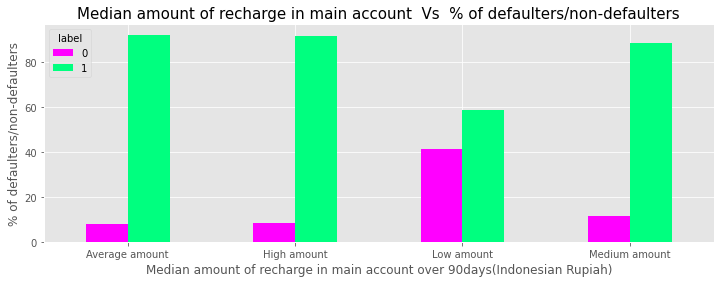

In [40]:
# Creating different categories for medianamnt_ma_rech90
medianamnt_categories=[(df['medianamnt_ma_rech90']<=500),df['medianamnt_ma_rech90'].between(500,1000),df['medianamnt_ma_rech90'].between(1000,10000),(df['medianamnt_ma_rech90']>10000)]
medianamnt_values=["Low amount","Medium amount","Average amount","High amount"]
df['medianamnt_ma_rech90_category']=np.select(medianamnt_categories,medianamnt_values)
df['medianamnt_ma_rech90_category'].value_counts()

# Creating cross table
medianamnt_categorycrosstab=pd.crosstab(df['label'],df['medianamnt_ma_rech90_category']).apply(lambda x:x/x.sum()*100)
medianamnt_categorycrosstab=medianamnt_categorycrosstab.transpose()

# Plotting graph
medianamnt_categorycrosstab.plot(kind='bar',color=["fuchsia",'springgreen'],figsize=(12,4))
print(medianamnt_categorycrosstab)
style.use("ggplot")
plt.xlabel("Median amount of recharge in main account over 90days(Indonesian Rupiah)")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters/non-defaulters")
plt.title("Median amount of recharge in main account  Vs  % of defaulters/non-defaulters",fontsize=15)
plt.show()

## Cnt_ma_rech90 Feature

In [41]:
# Checkking cnt_ma_rech90 feature description
df['cnt_ma_rech90'].describe()

count    209592.000000
mean          6.315437
std           7.193487
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         336.000000
Name: cnt_ma_rech90, dtype: float64

label                           0          1
cnt_ma_rech90_category                      
Average rech frequency   9.461707  90.538293
High rech frequency      0.614017  99.385983
No recharge             43.670644  56.329356


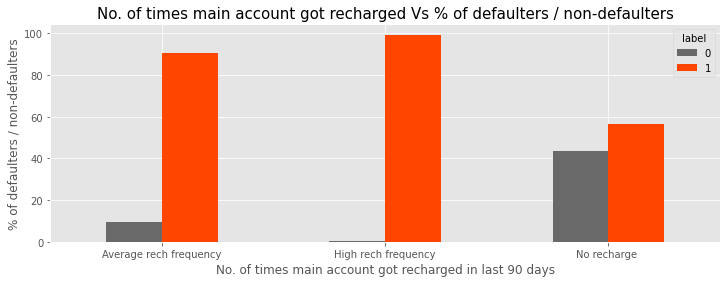

In [42]:
# Creating different categories for cnt_ma_rech90 feature
cntma_categories=[(df['cnt_ma_rech90']==0),df['cnt_ma_rech90'].between(1,20),(df['cnt_ma_rech90']>20)]
cntma_values=["No recharge ","Average rech frequency","High rech frequency"]
df['cnt_ma_rech90_category']=np.select(cntma_categories,cntma_values)
df['cnt_ma_rech90_category'].value_counts()

# Creating crosstable
cntma_categorycrosstab=pd.crosstab(df['label'],df['cnt_ma_rech90_category']).apply(lambda x:x/x.sum()*100)
cntma_categorycrosstab=cntma_categorycrosstab.transpose()

# Plotting graph
cntma_categorycrosstab.plot(kind='bar',color=['dimgrey','orangered'],figsize=(12,4))
print(cntma_categorycrosstab)
style.use("ggplot")
plt.xlabel("No. of times main account got recharged in last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("No. of times main account got recharged Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* High percentage of defaulters among those who have no recharge in last 90 days, 43% are defaulters.
* While there are some cases in which users are having an average of more than or near about 3 recharges per day but the percentage of defaulters among them are least.

## Cnt_da_rech90 Feature

In [43]:
# Checking cnt_da_rech90 feature description
df['cnt_da_rech90'].describe()

count    209592.000000
mean          0.041495
std           0.397557
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

label                           0          1
cnt_da_rech90_category                      
Below 5 times rech       8.397683  91.602317
High rech frequency     16.577540  83.422460
No recharge             12.582201  87.417799


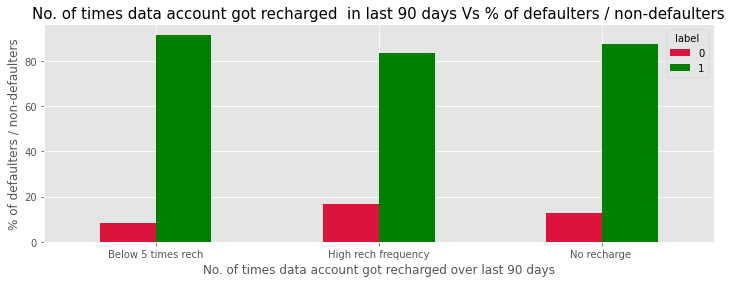

In [44]:
# Creating different categories for cnt_da_rech90
cntda_categories=[(df['cnt_da_rech90']==0),df['cnt_da_rech90'].between(1,5),(df['cnt_da_rech90']>5)]
cntda_values=["No recharge ","Below 5 times rech","High rech frequency"]
df['cnt_da_rech90_category']=np.select(cntda_categories,cntda_values)
df['cnt_da_rech90_category'].value_counts()

# Creating crosstable
cntda_categorycrosstab=pd.crosstab(df['label'],df['cnt_da_rech90_category']).apply(lambda x:x/x.sum()*100)
cntda_categorycrosstab=cntda_categorycrosstab.transpose()

# Plotting graph
cntda_categorycrosstab.plot(kind='bar',color=['crimson','green'],figsize=(12,4))
print(cntda_categorycrosstab)
style.use("ggplot")
plt.xlabel("No. of times data account got recharged over last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("No. of times data account got recharged  in last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* Those with high recharge frequency(greater than 5) of data account are having higher percentage of defaulters. Almost 16% of high recharge frequency are defaulters.

## fr_ma_rech90    Feature        

In [45]:
# Checking fr_ma_rech90 feature description
df['fr_ma_rech90'].describe()

count    209592.000000
mean          7.716812
std          12.590273
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

label                          0          1
fr_ma_rech90_category                      
Above 5 times           7.354105  92.645895
Below 5 times          15.025659  84.974341


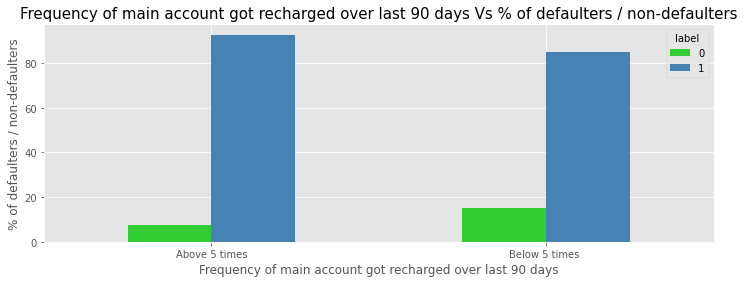

In [46]:
# Creating different categories for fr_ma_rech90
fr_ma_rech90_categories=[(df['fr_ma_rech90']<=5),(df['fr_ma_rech90']>5)]
fr_ma_rech90_values=["Below 5 times ","Above 5 times"]
df['fr_ma_rech90_category']=np.select(fr_ma_rech90_categories,fr_ma_rech90_values)
df['fr_ma_rech90_category'].value_counts()

# Creating crosstable
fr_ma_rech90_categorycrosstab=pd.crosstab(df['label'],df['fr_ma_rech90_category']).apply(lambda x:x/x.sum()*100)
fr_ma_rech90_categorycrosstab=fr_ma_rech90_categorycrosstab.transpose()
# Plotting graph
fr_ma_rech90_categorycrosstab.plot(kind='bar',color=['limegreen','steelblue'],figsize=(12,4))
print(fr_ma_rech90_categorycrosstab)
style.use("ggplot")
plt.xlabel("Frequency of main account got recharged over last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Frequency of main account got recharged over last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

## fr_da_rech90    Feature        

In [47]:
# Checking fr_da_rech90 featuare description
df['fr_da_rech90'].describe()

count    209592.000000
mean          0.045713
std           0.951388
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

label                          0          1
fr_da_rech90_category                      
Above 5 times          17.689531  82.310469
Below 5 times          12.468546  87.531454


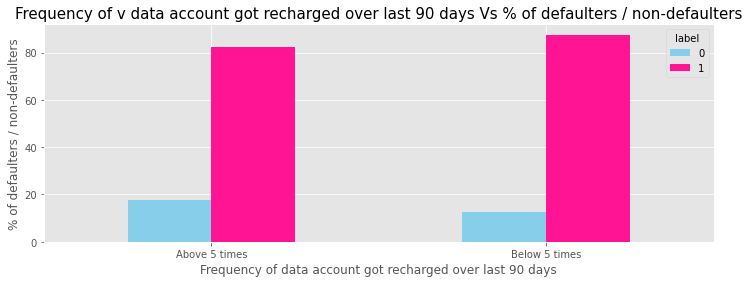

In [48]:
# Creating different categories for fr_da_rech90
fr_da_rech90_categories=[(df['fr_da_rech90']<=5),(df['fr_da_rech90']>5)]
fr_da_rech90_values=["Below 5 times","Above 5 times"]
df['fr_da_rech90_category']=np.select(fr_da_rech90_categories,fr_da_rech90_values)
df['fr_da_rech90_category'].value_counts()

# Creating crosstable
fr_da_rech90_categorycrosstab=pd.crosstab(df['label'],df['fr_da_rech90_category']).apply(lambda x:x/x.sum()*100)
fr_da_rech90_categorycrosstab=fr_da_rech90_categorycrosstab.transpose()

# Plotting graph
fr_da_rech90_categorycrosstab.plot(kind='bar',color=['skyblue','deeppink'],figsize=(12,4))
print(fr_da_rech90_categorycrosstab)
style.use("ggplot")
plt.xlabel("Frequency of data account got recharged over last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Frequency of v data account got recharged over last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

## Cnt_loans90 Feature

In [49]:
# Checking cnt_loans90 feature description
df['cnt_loans90'].describe()

count    209592.000000
mean         18.520988
std         224.797957
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

label                         0           1
cnt_loans90_category                       
Bet 10-20 loans        0.826079   99.173921
No loans               0.000000  100.000000
Too much loans         4.617554   95.382446
bet 1-10 loans        13.407353   86.592647


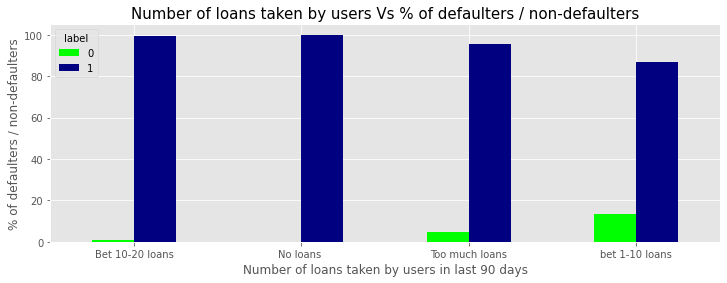

In [50]:
# Creating different categories for cnt_loans90
cntloan_categories=[(df['cnt_loans90']==0),df['cnt_loans90'].between(1,10),df['cnt_loans90'].between(10,20),(df['cnt_loans90']>20)]
cntloan_values=["No loans ","bet 1-10 loans","Bet 10-20 loans","Too much loans"]
df['cnt_loans90_category']=np.select(cntloan_categories,cntloan_values)
df['cnt_loans90_category'].value_counts()

# Creating crosstable
cntloan_categorycrosstab=pd.crosstab(df['label'],df['cnt_loans90_category']).apply(lambda x:x/x.sum()*100)
cntloan_categorycrosstab=cntloan_categorycrosstab.transpose()

# Plotting graph
cntloan_categorycrosstab.plot(kind='bar',color=["lime","navy"],figsize=(12,4))
print(cntloan_categorycrosstab)
style.use("ggplot")
plt.xlabel("Number of loans taken by users in last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Number of loans taken by users Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* Those who are not taking any loans ,they cann't be defaulters.
* Those who take loans below 10 times in 90 days are among with highest defaulter's percentage.
* While as the number of times loans taken by users increases, defaulter's percentage also decreases.


## amnt_loans90   Feature

In [51]:
# Checking amnt_loans90 feature description
df['amnt_loans90'].describe()

count    209592.000000
mean         23.645397
std          26.469924
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

label                          0           1
amnt_loans90_category                       
Bet 0-100              12.900774   87.099226
More than 100           0.563154   99.436846
No loans                0.000000  100.000000


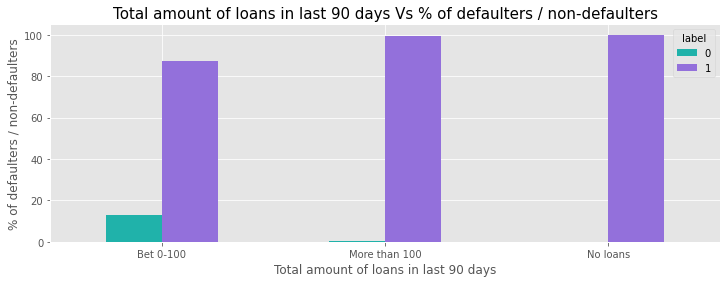

In [52]:
# Creating different categoreis for amnt_loans90
amnt_loans90_categories=[(df['amnt_loans90']==0),df['amnt_loans90'].between(0,100),(df['amnt_loans90']>=100)]
amnt_loans90_values=["No loans","Bet 0-100","More than 100"]
df['amnt_loans90_category']=np.select(amnt_loans90_categories,amnt_loans90_values)
df['amnt_loans90_category'].value_counts()

# Creating crossatable
payback_categorycrosstab=pd.crosstab(df['label'],df['amnt_loans90_category']).apply(lambda x:x/x.sum()*100)
payback_categorycrosstab=payback_categorycrosstab.transpose()

# Plotting graph
payback_categorycrosstab.plot(kind='bar',color=['lightseagreen',"mediumpurple"],figsize=(12,4))
print(payback_categorycrosstab)
plt.xlabel("Total amount of loans in last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Total amount of loans in last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

## maxamt_loan90    Feature

In [53]:
# Checking maxamnt_loans90 feature description
df['maxamnt_loans90'].describe()

count    209592.000000
mean          6.703138
std           2.103869
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

label                             0           1
maxamnt_loans90_category                       
Bet 0-6                   13.893801   86.106199
More than 6                3.841383   96.158617
No loans                   0.000000  100.000000


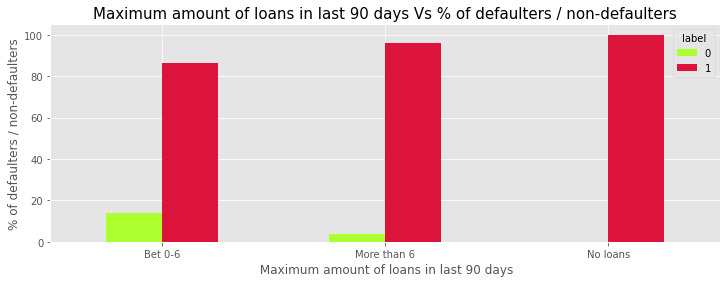

In [54]:
# Creating different categoreis for maxamnt_loans90
maxamnt_loans90_categories=[(df['maxamnt_loans90']==0),df['maxamnt_loans90'].between(0,6),(df['maxamnt_loans90']>=6)]
maxamnt_loans90_values=["No loans","Bet 0-6","More than 6"]
df['maxamnt_loans90_category']=np.select(maxamnt_loans90_categories,maxamnt_loans90_values)
df['maxamnt_loans90_category'].value_counts()

# Creating crosstable
payback_categorycrosstab=pd.crosstab(df['label'],df['maxamnt_loans90_category']).apply(lambda x:x/x.sum()*100)
payback_categorycrosstab=payback_categorycrosstab.transpose()

# Plotting graph
payback_categorycrosstab.plot(kind='bar',color=['greenyellow',"crimson"],figsize=(12,4))
print(payback_categorycrosstab)
plt.xlabel(" Maximum amount of loans in last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Maximum amount of loans in last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* Almost 14% of users who take loans of 5 Indonesian Rupiah are defaulters.
* While the defaulters percentage is less where users take loan 10 Indonesian Rupiah.

## medianamnt_loans90         Feature

In [55]:
# Checking medianamnt_loans90 feature description
df['medianamnt_loans90'].describe()

count    209592.000000
mean          0.046078
std           0.200692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64

label                                0          1
medianamnt_loans90_category                      
Bet 0-6                       7.658805  92.341195
No loans                     12.779666  87.220334


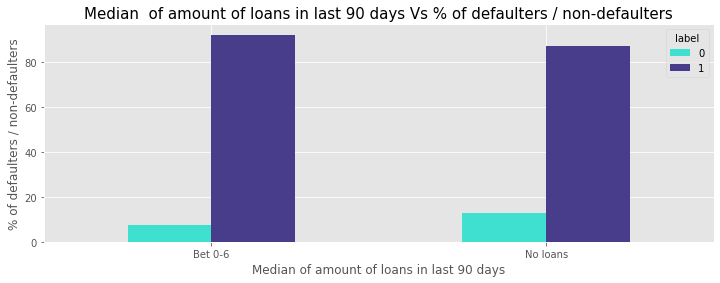

In [56]:
# Creating different categores for medianamnt_loans90
medianamnt_loans90_categories=[(df['medianamnt_loans90']==0),df['medianamnt_loans90'].between(0,6),(df['medianamnt_loans90']>=6)]
medianamnt_loans90_values=["No loans","Bet 0-6","More than 6"]
df['medianamnt_loans90_category']=np.select(medianamnt_loans90_categories,medianamnt_loans90_values)
df['medianamnt_loans90_category'].value_counts()

# Creating crosstable
payback_categorycrosstab=pd.crosstab(df['label'],df['medianamnt_loans90_category']).apply(lambda x:x/x.sum()*100)
payback_categorycrosstab=payback_categorycrosstab.transpose()

# Plotting graph
payback_categorycrosstab.plot(kind='bar',color=['turquoise',"darkslateblue"],figsize=(12,4))
print(payback_categorycrosstab)
plt.xlabel("Median of amount of loans in last 90 days")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Median  of amount of loans in last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

## Payback90 Feature

label                                 0          1
payback90_category                                
More than 5 days              14.003454  85.996546
less than or equal to 5 days   7.028943  92.971057


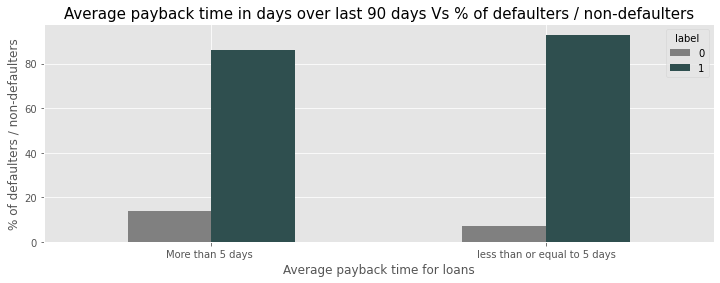

In [57]:
# Creating different categories for payback90 feature
payback_categories=[(df['payback90']<=5),(df['payback90']>5)]
payback_values=["More than 5 days ","less than or equal to 5 days"]
df['payback90_category']=np.select(payback_categories,payback_values)
df['payback90_category'].value_counts()

# Creating crosstable
payback_categorycrosstab=pd.crosstab(df['label'],df['payback90_category']).apply(lambda x:x/x.sum()*100)
payback_categorycrosstab=payback_categorycrosstab.transpose()

# Plotting graph
payback_categorycrosstab.plot(kind='bar',color=['grey',"darkslategray"],figsize=(12,4))
print(payback_categorycrosstab)
plt.xlabel("Average payback time for loans")
plt.xticks(rotation=0)
plt.ylabel("% of defaulters / non-defaulters")
plt.title("Average payback time in days over last 90 days Vs % of defaulters / non-defaulters",fontsize=15)
plt.show()

###### Observations:-
* Based on the loan payback time, 7% of users who take less than or equal to 5 days are defaulters.
* And 14% of users who take more than 5 days for repayment of loans are defaulters.

In [58]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)

pcircle
daily_decr90_category
rental90_category
last_rech_amt_ma_category
sumamnt_ma_rech90_category
medianamnt_ma_rech90_category
cnt_ma_rech90_category
cnt_da_rech90_category
fr_ma_rech90_category
fr_da_rech90_category
cnt_loans90_category
amnt_loans90_category
maxamnt_loans90_category
medianamnt_loans90_category
payback90_category


In [59]:
# Dropping columns to avoid multicollinearity
df.drop(['daily_decr90','rental90','last_rech_amt_ma','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_da_rech90','fr_da_rech90','cnt_loans90','amnt_loans90','maxamnt_loans90','medianamnt_loans90','payback90'],axis=1,inplace=True)

In [60]:
# After dropping some columns checking the shape of dataset
df.shape

(209592, 22)

## Handling Outliers 

In [61]:
# Making a function for detecting outliers which has skewness using IQR method
def IQR_Outliers(dataframe,feature):
    IQR=dataframe[feature].quantile(0.75)-dataframe[feature].quantile(0.25)
    lower_bridge=dataframe[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=dataframe[feature].quantile(0.75)+(IQR*1.5)
    return(lower_bridge,upper_bridge)
# Will use it when there is less skewness in our data

In [62]:
# Making another function for detecting outlers using IQR method to deal high skewness data
def IQR3_Outliers(dataframe,feature):
    IQR=dataframe[feature].quantile(0.75)-dataframe[feature].quantile(0.25)
    lower_bridge=dataframe[feature].quantile(0.25)-(IQR*3)
    upper_bridge=dataframe[feature].quantile(0.75)+(IQR*3)
    return(lower_bridge,upper_bridge)
# Will use it when  there is high skewness in our data

In [63]:
#function for detect Outliers when feature has Noramally Distributed (by mean-+3std)
def outlier_normally(dataframe,feature):
    lower_boundary = dataframe[feature].mean() - 3*dataframe[feature].std()
    upper_boundary = dataframe[feature].mean() + 3*dataframe[feature].std()
    return (lower_boundary,upper_boundary)

In [64]:
from scipy  import  stats
import pylab

In [65]:
# Function to plot histogram and boxplot 
def hist_box(dataframe,feature):
    sns.set_style("whitegrid")
    f=plt.figure(figsize=(17,4))
    f.add_subplot(1,2,1)
    #dataframe[feature].plot(kind="kde",c="r")
    sns.distplot(dataframe[feature],color='red')
    f.add_subplot(1,2,2)
    sns.boxplot(dataframe[feature],color='lightgreen',saturation=1.5,
    width=0.6)
    print('Skewness of %s = %0.2f' %(feature, dataframe[feature].skew()))
    plt.show()
          

In [66]:
# Function for plotting QQ plot

def original_dist(dataframe,feature):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    stats.probplot(dataframe[feature],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    dataframe[feature].hist()
    plt.title("original_dist")
    print('Skewness of %s = %0.2f' %(feature, dataframe[feature].skew()))
    plt.show()

In [67]:
# Function for log-transformation

def log_transform(dataframe,feature):
    dataframe_copy=dataframe.copy()
    if 0 in dataframe_copy[feature].unique():
        pass
    else:
        dataframe_copy[feature]=np.log(dataframe_copy[feature])
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        stats.probplot(dataframe_copy[feature],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        dataframe_copy[feature].hist()
        plt.title("Log Transformation")
        print('Skewness of %s = %0.2f' %(feature, dataframe_copy[feature].skew()))
        plt.show()

In [68]:
# Function for reciprocal transformation 
def reciprocal_transform(dataframe,feature):
    dataframe_copy=dataframe.copy()
    if 0 in dataframe_copy[feature].unique():
        pass
    else:
        dataframe_copy[feature]=1/dataframe_copy[feature]
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        stats.probplot(dataframe_copy[feature],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        dataframe_copy[feature].hist()
        plt.title("Reciprocal Transformation")
        print('Skewness of %s = %0.2f' %(feature, dataframe_copy[feature].skew()))
        plt.show()

In [69]:
# Function for exponential transformation
def exponential_transform(dataframe,feature):
    dataframe_copy=dataframe.copy()
    if 0 in dataframe_copy[feature].unique():
        pass
    else:
        dataframe_copy[feature]=dataframe_copy[feature]**(1/1.2)
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        stats.probplot(dataframe_copy[feature],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        dataframe_copy[feature].hist()
        plt.title("Exponential Transformation")
        print('Skewness of %s = %0.2f' %(feature, dataframe_copy[feature].skew()))
        plt.show()

In [70]:
# Function for square-root transformation
def sqrt_transform(dataframe,feature):
    dataframe_copy=dataframe.copy()
    if 0 in dataframe_copy[feature].unique():
        pass
    else:
        dataframe_copy[feature]=dataframe_copy[feature]**(1.2)
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        stats.probplot(dataframe_copy[feature],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        dataframe_copy[feature].hist()
        plt.title("Square_root Transformation")
        print('Skewness of %s = %0.2f' %(feature, dataframe_copy[feature].skew()))
        plt.show()

In [71]:
# Function for boxcox transformation
from sklearn.preprocessing import PowerTransformer
def power_transform(dataframe,feature):
    dataframe_copy=dataframe.copy()
    if 0 in dataframe_copy[feature].unique():
        pass
    else:
        dataframe_copy[[feature]]=PowerTransformer().fit_transform(dataframe_copy[[feature]])
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        stats.probplot(dataframe_copy[feature],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        dataframe_copy[feature].hist()
        plt.title("Power Transformation")
        print('Skewness of %s = %0.2f' %(feature, dataframe_copy[feature].skew()))
        plt.show()
        

## ****** cnt_ma_rech30   Feature   ******

Skewness of cnt_ma_rech30 = 3.28


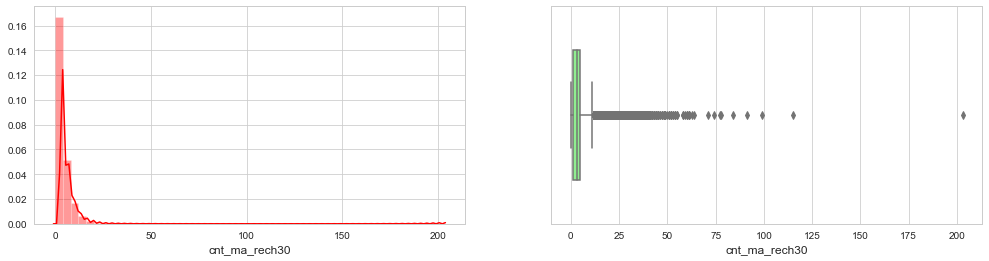

In [72]:
# Plotting histogram and boxplot
hist_box(df,'cnt_ma_rech30') 

Skewness of cnt_ma_rech30 = 3.28


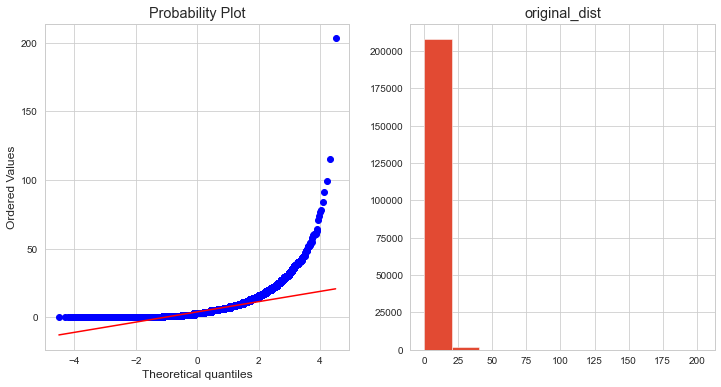

In [73]:
# Plotting QQ plot for checking data distributon
original_dist(df,'cnt_ma_rech30')

In [74]:
# This feature seems to be not normally distributed. So using IQR3 method 
print(IQR3_Outliers(df,'cnt_ma_rech30'))
print(IQR_Outliers(df,'cnt_ma_rech30'))
print(outlier_normally(df,'cnt_ma_rech30'))

(-11.0, 17.0)
(-5.0, 11.0)
(-8.790244900810237, 16.746350095665)


In [75]:
 df['cnt_ma_rech30'].describe()

count    209592.000000
mean          3.978053
std           4.256099
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

In [76]:
df.loc[df['cnt_ma_rech30']>=11.0,"cnt_ma_rech30"]=11.0

In [77]:
df[df['cnt_ma_rech30']>=11.0]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
25,1,11.0,12674.0,770.0,134.60,5,1.800000,UPW,Bet 10-10000,Average balance,Medium amount,High amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
51,1,11.0,13861.0,1539.0,44.60,10,2.727273,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
55,1,11.0,20777.0,1539.0,29.00,12,3.250000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
86,1,11.0,10778.0,770.0,26.75,8,3.142857,UPW,High Amount,Average balance,Medium amount,High amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
130,1,11.0,28775.0,2309.0,26.00,10,1.909091,UPW,High Amount,High balance,Average amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Too much loans,More than 100,More than 6,No loans,More than 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209545,1,11.0,16930.0,1539.0,19.67,10,2.500000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209550,1,11.0,19248.0,1156.0,71.00,12,2.250000,UPW,High Amount,Average balance,Average amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Too much loans,More than 100,More than 6,No loans,More than 5 days
209551,1,11.0,23967.0,1539.0,75.00,15,2.500000,UPW,High Amount,High balance,Medium amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,More than 100,Bet 0-6,No loans,More than 5 days
209559,1,11.0,15410.0,1539.0,16.50,8,2.375000,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days


Skewness of cnt_ma_rech30 = 0.90


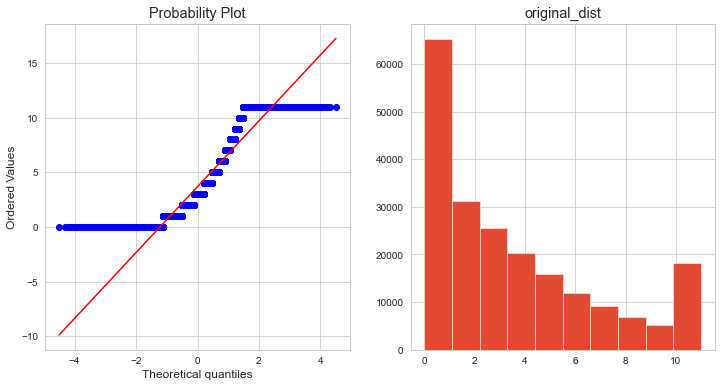

In [78]:
original_dist(df,'cnt_ma_rech30')

In [79]:
log_transform(df,'cnt_ma_rech30')
reciprocal_transform(df,'cnt_ma_rech30')
sqrt_transform(df,'cnt_ma_rech30')
exponential_transform(df,'cnt_ma_rech30')
power_transform(df,'cnt_ma_rech30')
# Due to presence of zero we cann't use skewness treating functions

# ** sumamnt_ma_rech30  **

Skewness of sumamnt_ma_rech30 = 6.39


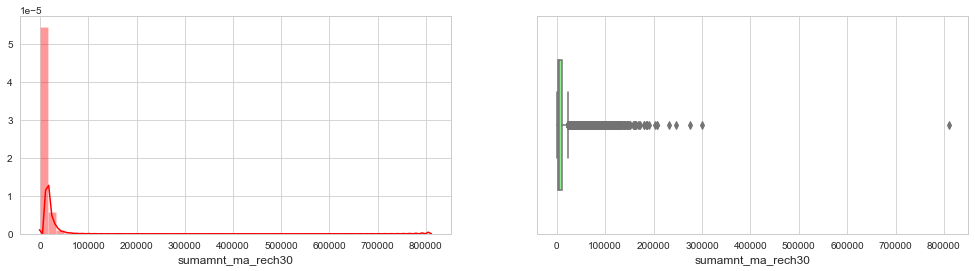

In [80]:
# Plotting histogram and boxplot
hist_box(df,"sumamnt_ma_rech30")

Skewness of sumamnt_ma_rech30 = 6.39


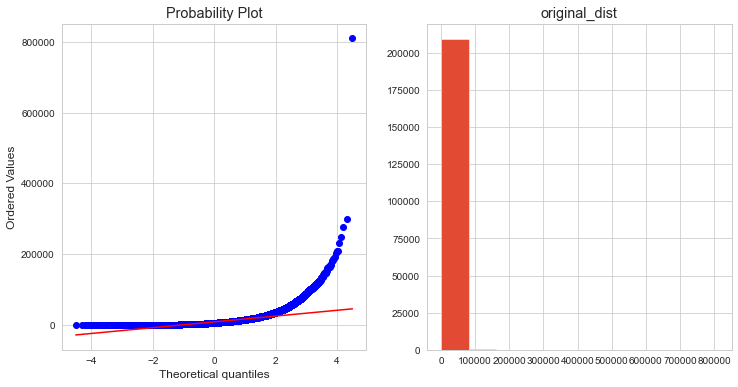

In [81]:
# Plotting QQ plot for checking data distributon
original_dist(df,'sumamnt_ma_rech30')

In [82]:
# This feature seems to be not normally distributed. So using IQR method 

print(IQR3_Outliers(df,'sumamnt_ma_rech30'))
print(IQR_Outliers(df,'sumamnt_ma_rech30'))
print(outlier_normally(df,'sumamnt_ma_rech30'))

(-23870.0, 35420.0)
(-11165.0, 22715.0)
(-22714.440486455816, 38123.43362550692)


In [83]:
df['sumamnt_ma_rech30'].describe()

count    209592.000000
mean       7704.496570
std       10139.645685
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

In [84]:
df.loc[df['sumamnt_ma_rech30']>=22715.0,"sumamnt_ma_rech30"]=22715.0

In [85]:
df[df['sumamnt_ma_rech30']>=22715.0]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
28,1,9.0,22715.0,2309.0,85.72,8,1.375000,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
36,1,10.0,22715.0,2309.0,62.74,6,2.000000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,More than 100,More than 6,No loans,More than 5 days
49,1,6.0,22715.0,8000.0,188.00,2,0.000000,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
60,1,5.0,22715.0,8000.0,71.28,1,0.000000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
64,1,8.0,22715.0,3178.5,275.17,6,2.166667,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,More than 6,No loans,More than 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209441,1,8.0,22715.0,6907.0,178.00,1,0.000000,UPW,Bet 10-10000,Zero or negative balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
209551,1,11.0,22715.0,1539.0,75.00,15,2.500000,UPW,High Amount,High balance,Medium amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,More than 100,Bet 0-6,No loans,More than 5 days
209553,1,7.0,22715.0,8000.0,548.57,1,0.000000,UPW,Bet 10-10000,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
209557,1,5.0,22715.0,5787.0,76.50,5,1.800000,UPW,High Amount,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,More than 6,No loans,More than 5 days


Skewness of sumamnt_ma_rech30 = 1.08


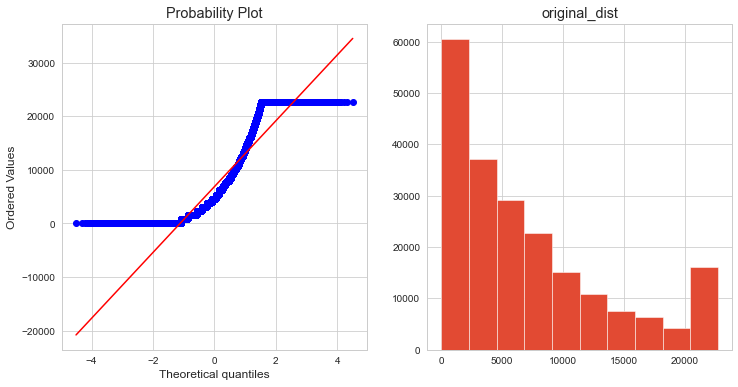

In [86]:
original_dist(df,'sumamnt_ma_rech30')

In [87]:
log_transform(df,'sumamnt_ma_rech30')
reciprocal_transform(df,'sumamnt_ma_rech30')
sqrt_transform(df,'sumamnt_ma_rech30')
exponential_transform(df,'sumamnt_ma_rech30')
power_transform(df,'sumamnt_ma_rech30')
# Due to presence of zero we cann't use skewness treating functions

# ** medianamnt_ma_rech30 **

Skewness of medianamnt_ma_rech30 = 3.51


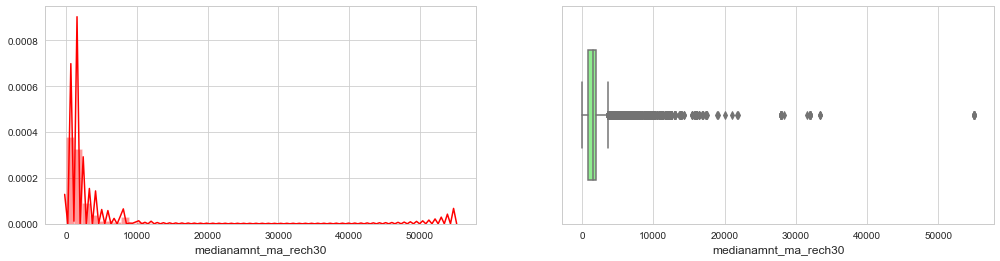

In [88]:
# Plotting histogram and boxplot
hist_box(df,"medianamnt_ma_rech30")

Skewness of medianamnt_ma_rech30 = 3.51


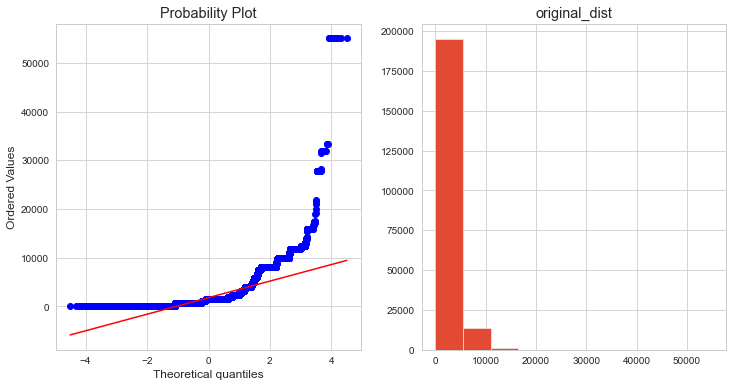

In [89]:
# Plotting QQ plot for checking data distributon
original_dist(df,'medianamnt_ma_rech30')

In [90]:
# This feature seems to be not normally distributed. So using IQR3 method 

print(IQR3_Outliers(df,'medianamnt_ma_rech30'))
print(IQR_Outliers(df,'medianamnt_ma_rech30'))
print(outlier_normally(df,'medianamnt_ma_rech30'))

(-2692.0, 5386.0)
(-961.0, 3655.0)
(-4399.789162483245, 8025.427679220524)


In [91]:
df['medianamnt_ma_rech30'].describe()

count    209592.000000
mean       1812.819258
std        2070.869474
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

In [92]:
df.loc[df['medianamnt_ma_rech30']>=3655.0,"medianamnt_ma_rech30"]=3655.0

In [93]:
df[df['medianamnt_ma_rech30']>=3655.0]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
1,1,1.0,5787.0,3655.0,61.04,1,0.000000,UPW,High Amount,Average balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,More than 6,No loans,More than 5 days
6,1,1.0,5787.0,3655.0,277.80,1,0.000000,UPW,Bet 10-10000,Low balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
11,0,2.0,9065.0,3655.0,489.00,1,0.000000,UPW,Bet 10-10000,Low balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
12,1,4.0,19086.0,3655.0,92.00,4,1.333333,UPW,Bet 10-10000,Low balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
19,1,2.0,9539.0,3655.0,12.00,2,5.000000,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209572,1,1.0,7526.0,3655.0,10.00,1,0.000000,UPW,High Amount,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
209575,1,3.0,14852.0,3655.0,28.20,1,1.000000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209576,1,3.0,22715.0,3655.0,161.00,2,5.500000,UPW,Bet 10-10000,Average balance,High amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209580,1,1.0,11874.0,3655.0,31.00,0,0.000000,UPW,High Amount,High balance,High amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,No loans,No loans,No loans,No loans,More than 5 days


Skewness of medianamnt_ma_rech30 = 0.73


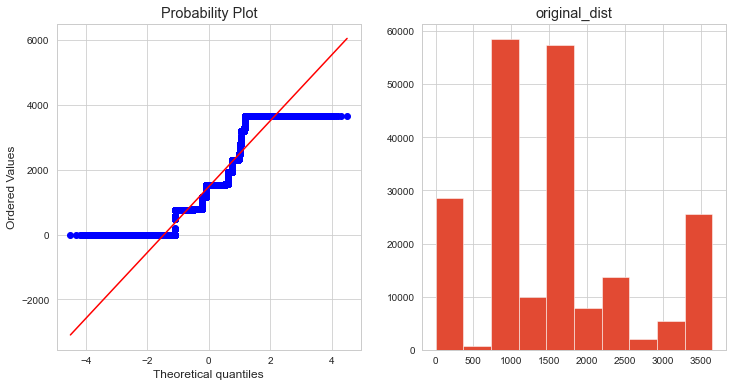

In [94]:
original_dist(df,'medianamnt_ma_rech30')

In [95]:
log_transform(df,'medianamnt_ma_rech30')
reciprocal_transform(df,'medianamnt_ma_rech30')
sqrt_transform(df,'medianamnt_ma_rech30')
exponential_transform(df,'medianamnt_ma_rech30')
power_transform(df,'medianamnt_ma_rech30')
# Due to presence of zero we cann't use skewness treating functions

In [96]:
df.dtypes

label                              int64
cnt_ma_rech30                    float64
sumamnt_ma_rech30                float64
medianamnt_ma_rech30             float64
medianmarechprebal90             float64
cnt_loans30                        int64
payback30                        float64
pcircle                           object
daily_decr90_category             object
rental90_category                 object
last_rech_amt_ma_category         object
sumamnt_ma_rech90_category        object
medianamnt_ma_rech90_category     object
cnt_ma_rech90_category            object
cnt_da_rech90_category            object
fr_ma_rech90_category             object
fr_da_rech90_category             object
cnt_loans90_category              object
amnt_loans90_category             object
maxamnt_loans90_category          object
medianamnt_loans90_category       object
payback90_category                object
dtype: object

# **  medianmarechprebal90   Feature **

Skewness of medianmarechprebal90 = 44.88


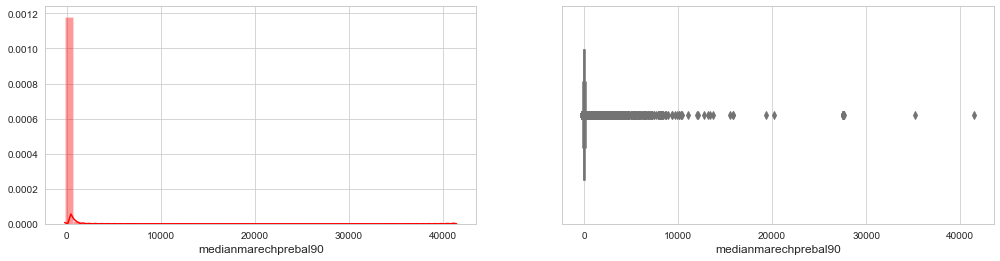

In [97]:
# Plotting histogram and boxplot
hist_box(df,"medianmarechprebal90")

Skewness of medianmarechprebal90 = 44.88


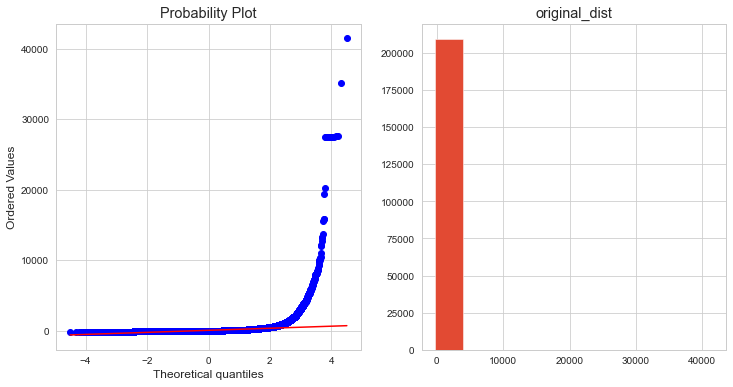

In [98]:
# Plotting QQ plot for checking data distributon
original_dist(df,'medianmarechprebal90')

In [99]:
# This feature seems to be not normally distributed. So using IQR method 

print(IQR3_Outliers(df,'medianmarechprebal90'))
print(IQR_Outliers(df,'medianmarechprebal90'))
print(outlier_normally(df,'medianmarechprebal90'))

(-179.5299999999995, 273.4399999999996)
(-82.46499999999969, 176.37499999999977)
(-1015.6240945058373, 1199.6751394884748)


In [100]:
df['medianmarechprebal90'].describe()

count    209592.000000
mean         92.025522
std         369.216539
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64

In [101]:
df.loc[df['medianmarechprebal90']>=176.37,"medianmarechprebal90"]=176.37

In [102]:
df[df['medianmarechprebal90']>=176.37]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
6,1,1.0,5787.0,3655.0,176.37,1,0.0,UPW,Bet 10-10000,Low balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
11,0,2.0,9065.0,3655.0,176.37,1,0.0,UPW,Bet 10-10000,Low balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
21,0,1.0,773.0,773.0,176.37,2,0.0,UPW,Bet 10-10000,Low balance,Medium amount,Average amount,Medium amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
29,1,2.0,3086.0,1543.0,176.37,1,0.0,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
49,1,6.0,22715.0,3655.0,176.37,2,0.0,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209530,1,3.0,3079.0,770.0,176.37,1,32.0,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209552,1,4.0,7795.0,1539.0,176.37,4,5.5,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209553,1,7.0,22715.0,3655.0,176.37,1,0.0,UPW,Bet 10-10000,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
209567,1,2.0,3078.0,1539.0,176.37,2,0.0,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days


Skewness of medianmarechprebal90 = 0.64


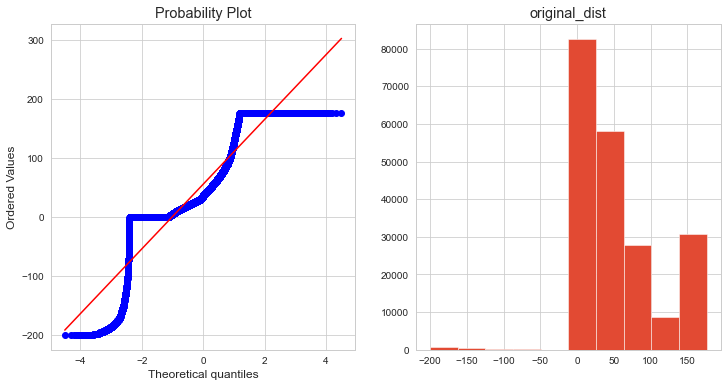

In [103]:
original_dist(df,'medianmarechprebal90')

In [104]:
log_transform(df,'medianmarechprebal90')
reciprocal_transform(df,'medianmarechprebal90')
sqrt_transform(df,'medianmarechprebal90')
exponential_transform(df,'medianmarechprebal90')
power_transform(df,'medianmarechprebal90')
# Due to presence of zero we cann't use skewness treating functions

# ** cnt_loans30   Feature **

Skewness of cnt_loans30 = 2.71


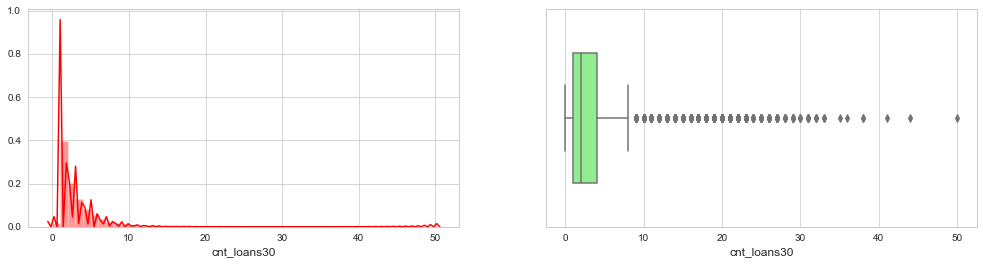

In [105]:
# Plotting histogram and boxplot
hist_box(df,"cnt_loans30")

Skewness of cnt_loans30 = 2.71


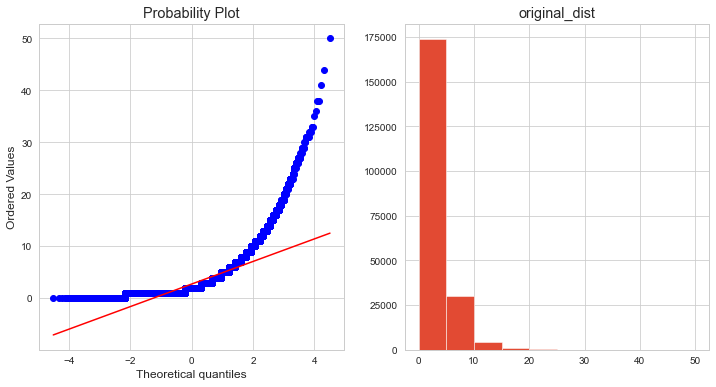

In [106]:
# Plotting QQ plot for checking data distributon
original_dist(df,'cnt_loans30')

In [107]:
# This feature seems to be not normally distributed. So using IQR method 

print(IQR3_Outliers(df,'cnt_loans30'))
print(IQR_Outliers(df,'cnt_loans30'))
print(outlier_normally(df,'cnt_loans30'))

(-8.0, 13.0)
(-3.5, 8.5)
(-4.904545826968344, 10.422494985333167)


In [108]:
df['cnt_loans30'].describe()

count    209592.000000
mean          2.758975
std           2.554507
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

In [109]:
df.loc[df['cnt_loans30']>=8.5,"cnt_loans30"]=8.5

In [110]:
df[df['cnt_loans30']>=8.5]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
51,1,11.0,13861.0,1539.0,44.60,8.5,2.727273,UPW,Bet 10-10000,Average balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
55,1,11.0,20777.0,1539.0,29.00,8.5,3.250000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
97,1,10.0,10016.0,773.0,59.87,8.5,2.800000,UPW,High Amount,Average balance,Medium amount,High amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days
130,1,11.0,22715.0,2309.0,26.00,8.5,1.909091,UPW,High Amount,High balance,Average amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Too much loans,More than 100,More than 6,No loans,More than 5 days
142,1,11.0,22715.0,1539.0,66.50,8.5,2.000000,UPW,High Amount,High balance,Average amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,More than 100,More than 6,No loans,More than 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209545,1,11.0,16930.0,1539.0,19.67,8.5,2.500000,UPW,High Amount,High balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209550,1,11.0,19248.0,1156.0,71.00,8.5,2.250000,UPW,High Amount,Average balance,Average amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Too much loans,More than 100,More than 6,No loans,More than 5 days
209551,1,11.0,22715.0,1539.0,75.00,8.5,2.500000,UPW,High Amount,High balance,Medium amount,High amount,Average amount,High rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,More than 100,Bet 0-6,No loans,More than 5 days
209558,1,10.0,10776.0,770.0,7.50,8.5,3.666667,UPW,Bet 10-10000,Average balance,Average amount,High amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,Bet 10-20 loans,Bet 0-100,Bet 0-6,No loans,More than 5 days


Skewness of cnt_loans30 = 1.34


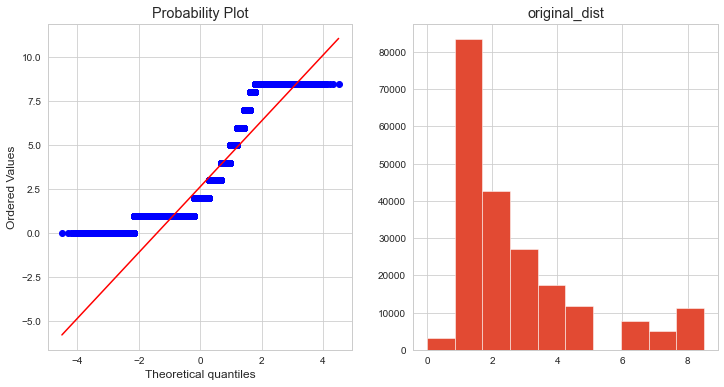

In [111]:
original_dist(df,'cnt_loans30')

In [112]:
log_transform(df,'cnt_loans30')
reciprocal_transform(df,'cnt_loans30')
sqrt_transform(df,'cnt_loans30')
exponential_transform(df,'cnt_loans30')
power_transform(df,'cnt_loans30')
# Due to presence of zero we cann't use skewness treating functions

# **  payback30    Feature **

Skewness of payback30 = 8.31


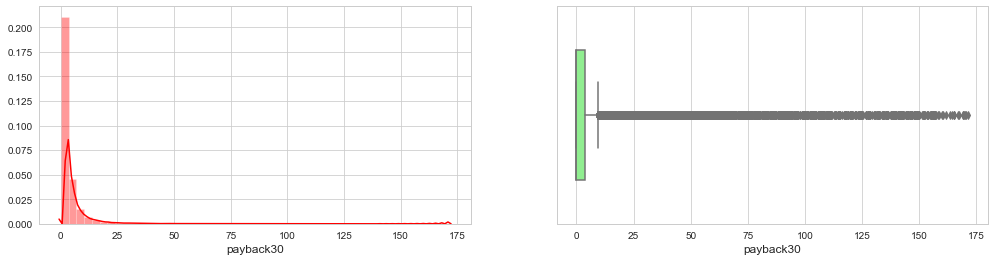

In [113]:
# Plotting histogram and boxplot
hist_box(df,"payback30")

Skewness of payback30 = 8.31


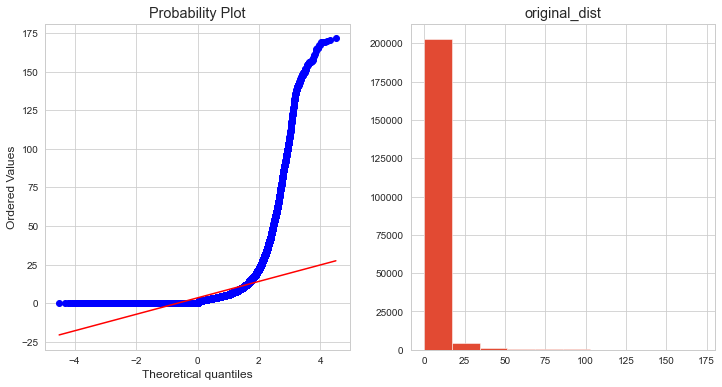

In [114]:
# Plotting QQ plot for checking data distributon
original_dist(df,'payback30')

In [115]:
# This feature seems to be not normally distributed. So using IQR method 

print(IQR3_Outliers(df,'payback30'))
print(IQR_Outliers(df,'payback30'))
print(outlier_normally(df,'payback30'))

(-11.25, 15.0)
(-5.625, 9.375)
(-23.04135254837923, 29.83862992646599)


In [116]:
df['payback30'].describe()

count    209592.000000
mean          3.398639
std           8.813330
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

In [117]:
df.loc[df['payback30']>=9.375,"payback30"]=9.375

In [118]:
df[df['payback30']>=9.375]

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,pcircle,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
0,0,2.0,3078.0,1539.0,7.50,2.0,9.375,UPW,Bet 10-10000,Low balance,Average amount,Average amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
5,1,4.0,6156.0,1539.0,55.90,3.0,9.375,UPW,Bet 10-10000,Low balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
31,1,3.0,3082.0,773.0,16.40,3.0,9.375,UPW,Bet 10-10000,Average balance,Medium amount,Average amount,Medium amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
35,1,2.0,2320.0,1160.0,20.50,2.0,9.375,UPW,Bet 10-10000,Average balance,Medium amount,Average amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,Bet 0-6,less than or equal to 5 days
41,1,2.0,12048.0,3655.0,45.00,2.0,9.375,UPW,Bet 10-10000,Zero or negative balance,Average amount,High amount,Average amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209519,1,4.0,3080.0,770.0,6.00,3.0,9.375,UPW,Bet 10-10000,High balance,Medium amount,Average amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209530,1,3.0,3079.0,770.0,176.37,1.0,9.375,UPW,Bet 10-10000,Average balance,Average amount,Average amount,Medium amount,Average rech frequency,No recharge,Below 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209542,1,2.0,1546.0,773.0,3.00,2.0,9.375,UPW,Bet 10-10000,Average balance,Medium amount,Average amount,Medium amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days
209556,1,2.0,1540.0,770.0,17.50,3.0,9.375,UPW,Bet 10-10000,Average balance,Medium amount,Average amount,Medium amount,Average rech frequency,No recharge,Above 5 times,Below 5 times,bet 1-10 loans,Bet 0-100,Bet 0-6,No loans,less than or equal to 5 days


Skewness of payback30 = 1.19


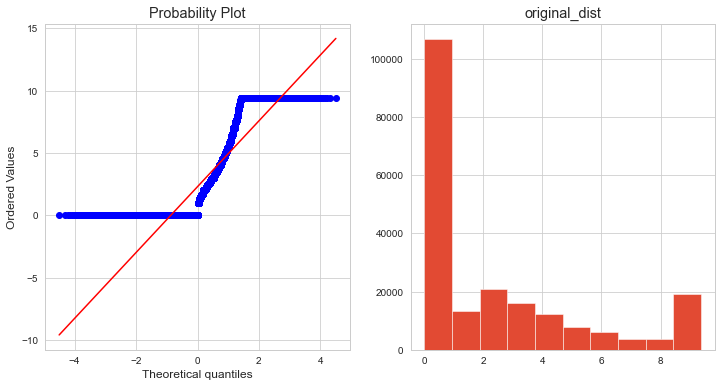

In [119]:
original_dist(df,'payback30')

In [120]:
log_transform(df,'payback30')
reciprocal_transform(df,'payback30')
sqrt_transform(df,'payback30')
exponential_transform(df,'payback30')
power_transform(df,'payback30')
# Due to presence of zero we cann't use skewness treating functions

In [121]:
# Checking skewness
df.skew()

label                  -2.270245
cnt_ma_rech30           0.904162
sumamnt_ma_rech30       1.080772
medianamnt_ma_rech30    0.728218
medianmarechprebal90    0.637805
cnt_loans30             1.340357
payback30               1.189328
dtype: float64

In [122]:
# Checking categorical features 
for col in df.columns:
    if df[col].dtype=="object":
        print(col)

pcircle
daily_decr90_category
rental90_category
last_rech_amt_ma_category
sumamnt_ma_rech90_category
medianamnt_ma_rech90_category
cnt_ma_rech90_category
cnt_da_rech90_category
fr_ma_rech90_category
fr_da_rech90_category
cnt_loans90_category
amnt_loans90_category
maxamnt_loans90_category
medianamnt_loans90_category
payback90_category


In [123]:
# As pcircle is not giving us useful informatioin, we can drop it.
df.drop(['pcircle'],axis=1,inplace=True)

## Model - Preprocessing

In [124]:
# Labeling the categorical features
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])

In [125]:
df.head(3)

,label,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
0,0,2.0,3078.0,1539.0,7.50,2.0,9.375,1,2,0,0,0,0,2,0,1,3,0,0,1,1
1,1,1.0,5787.0,3655.0,61.04,1.0,0.000,2,0,0,0,0,0,2,1,1,3,0,1,1,0
2,1,1.0,1539.0,1539.0,66.32,1.0,0.000,1,0,0,0,0,0,2,1,1,3,0,0,1,0


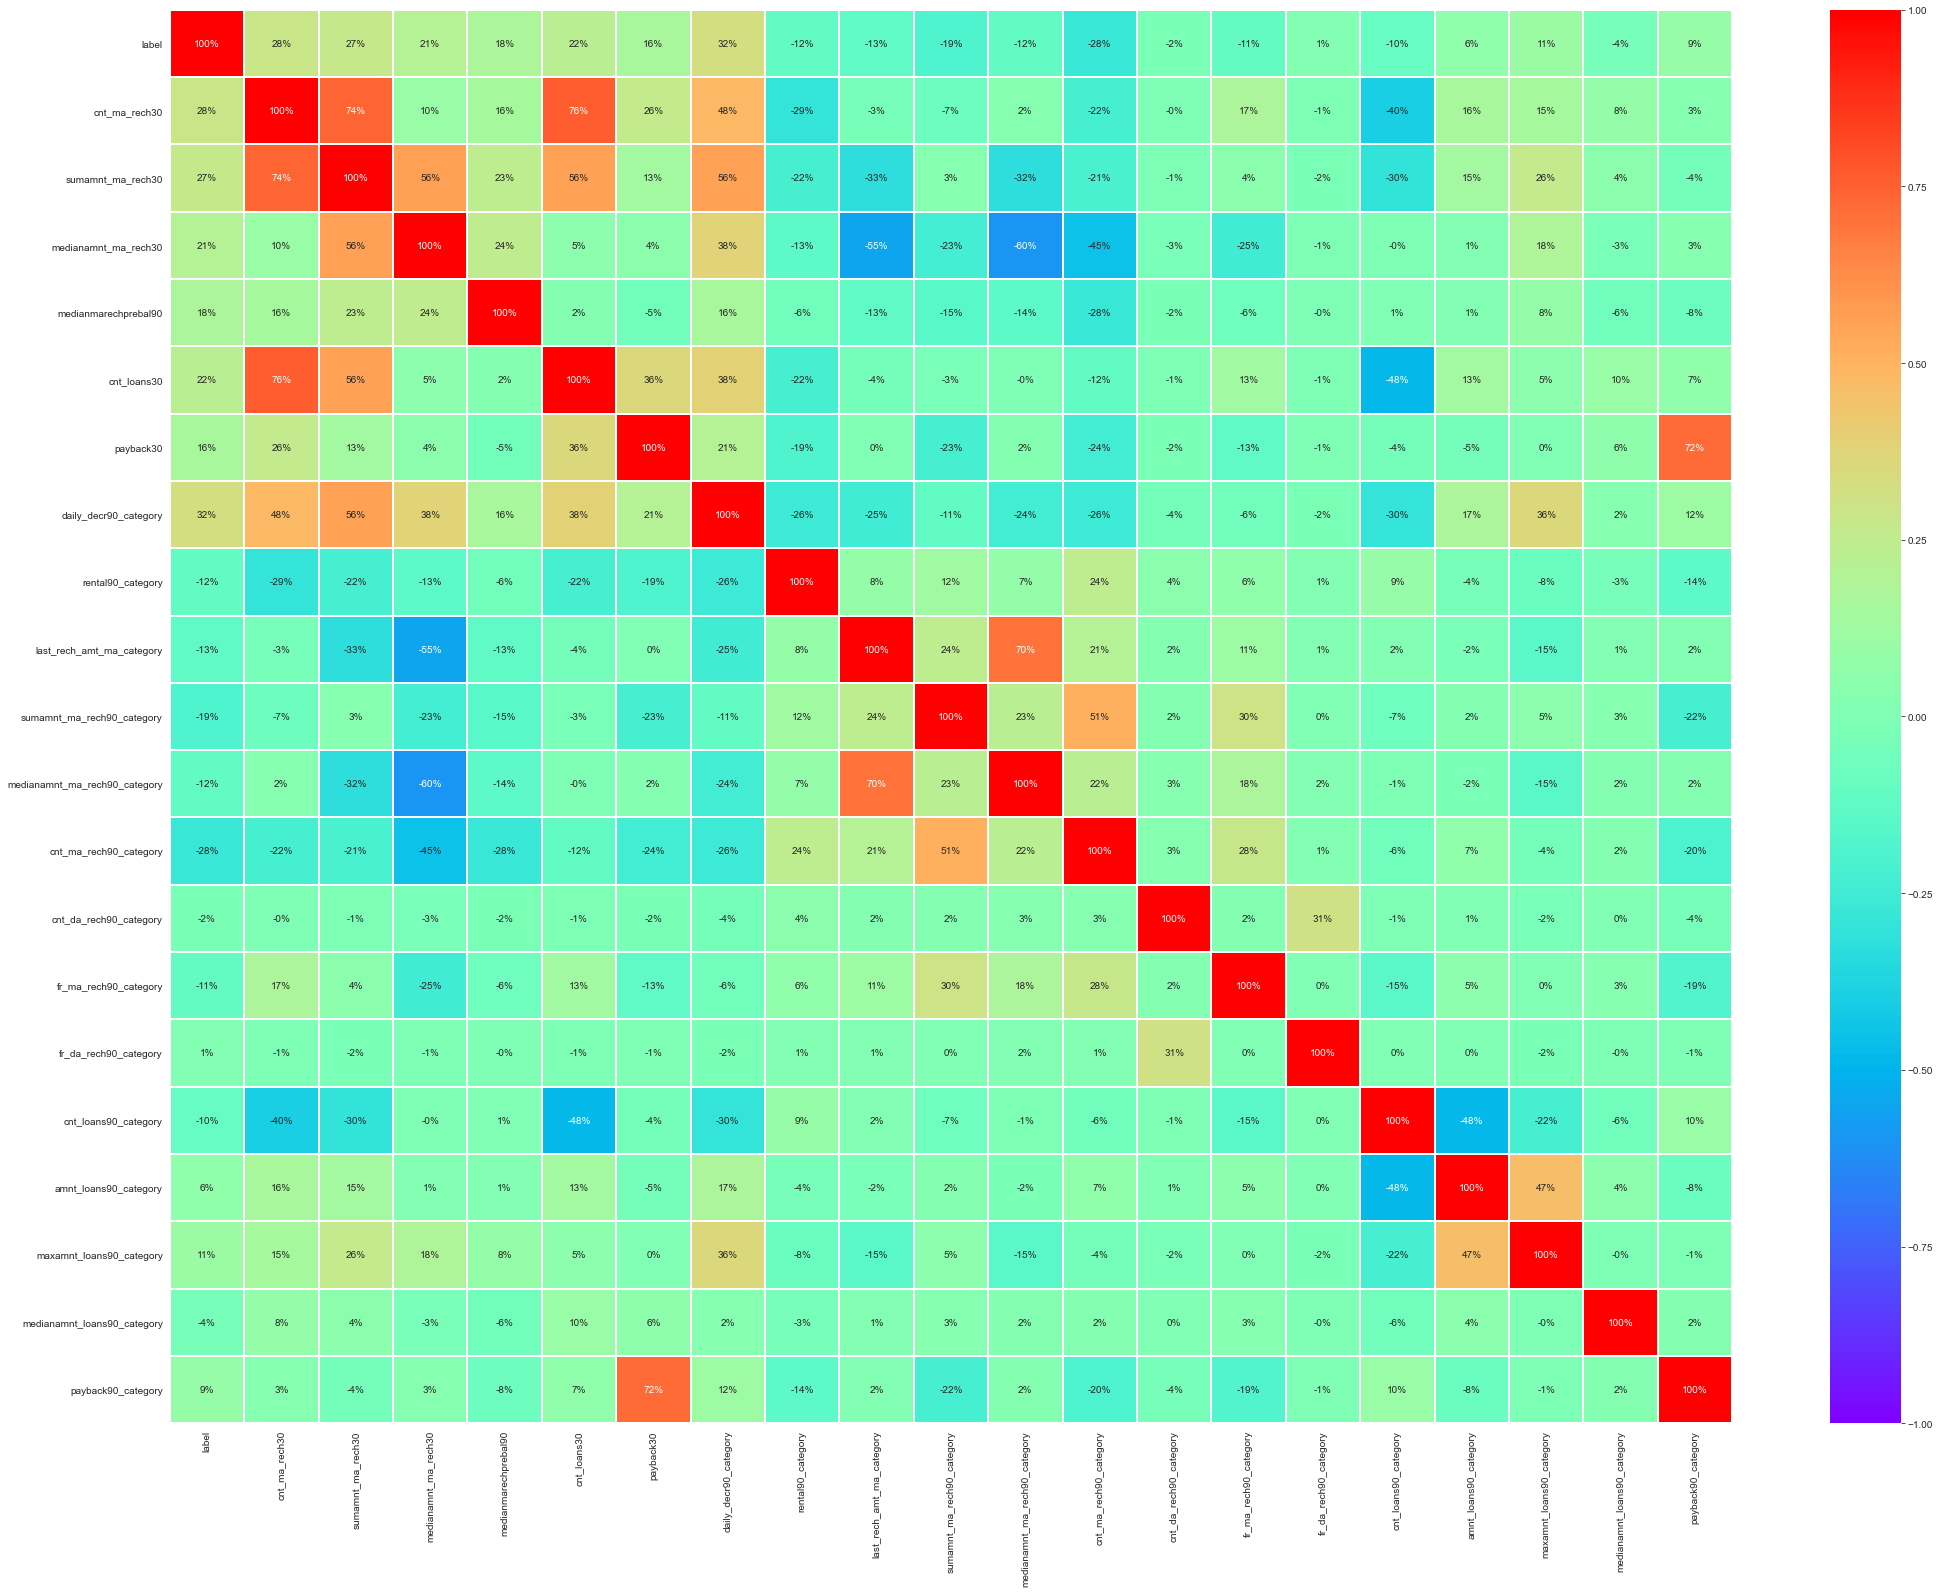

In [126]:
# checking the correlation
plt.figure(figsize=(35,26))
sns.heatmap(df.corr(),cmap='rainbow',annot=True,fmt="0.0%",vmin=-1,
            vmax=1, center= 0 ,linewidths=1, linecolor='white')

## Data preparation for model training

In [127]:
# Splitting data into independent features and dependent feature.
x= df.drop(['label'],axis=1)                 # x -> independent features
y= df['label']                               # y -> dependent feature

In [128]:
# checking the shape of independent and dependent features
print("Independent features shape -",x.shape)
print("Dependent feature shape -",y.shape)

Independent features shape - (209592, 20)
Dependent feature shape - (209592,)


In [129]:
#balance our data as we have a huge amount of imbalanced data in our target columns

from imblearn.combine import SMOTETomek
smote=SMOTETomek(random_state=42)
X,Y=smote.fit_sample(x,y)

In [130]:
# Checking the balancing 
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({1: 183430, 0: 26162})
Resampled dataset shape Counter({1: 178912, 0: 178912})


In [131]:
x=X

In [132]:
y=Y

In [133]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scale =StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)

In [134]:
# Checking the scaling done properly or not
x.head()

,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal90,cnt_loans30,payback30,daily_decr90_category,rental90_category,last_rech_amt_ma_category,sumamnt_ma_rech90_category,medianamnt_ma_rech90_category,cnt_ma_rech90_category,cnt_da_rech90_category,fr_ma_rech90_category,fr_da_rech90_category,cnt_loans90_category,amnt_loans90_category,maxamnt_loans90_category,medianamnt_loans90_category,payback90_category
0,-0.557251,0.161417,2.226570,0.312631,-0.617887,-0.596183,1.906869,-0.949382,-0.988724,-0.930294,-0.984802,-0.549027,0.158146,0.659173,0.061722,0.216131,-0.133247,3.017735,0.245326,-0.432897
1,-0.557251,-0.544816,0.300701,0.405709,-0.617887,-0.596183,0.217648,-0.949382,-0.988724,-0.930294,-0.984802,-0.549027,0.158146,0.659173,0.061722,0.216131,-0.133247,-0.289994,0.245326,-0.432897
2,-0.896149,-0.800676,-1.100014,-0.719331,-0.063512,-0.596183,0.217648,0.968181,1.285980,2.106171,1.286979,-0.549027,0.158146,0.659173,0.061722,0.216131,-0.133247,-0.289994,0.245326,-0.432897
3,1.476136,2.529160,1.001514,-0.146410,2.708366,0.208474,0.217648,-0.949382,-0.988724,0.081861,-0.984802,-0.549027,0.158146,0.659173,0.061722,0.216131,-0.133247,-0.289994,0.245326,-0.432897
4,0.459442,0.222764,0.300701,0.222021,0.490864,2.636814,0.217648,0.968181,-0.988724,0.081861,-0.984802,-0.549027,0.158146,0.659173,0.061722,0.216131,-0.133247,-0.289994,0.245326,2.310021


In [135]:
# Importing algorithms libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

# Ensemble algorithms 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

In [136]:
# function for finding best random state
def best_random_state(clf,x,y):
    max_acc_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r,stratify=y)
        clf.fit(x_train,y_train)
        t_pred=clf.predict(x_test)
        accuracy=accuracy_score(y_test,t_pred)
        if accuracy > max_acc_score:
            max_acc_score=accuracy
            max_r_state=r
    print("Maximum accuracy score at random state",max_r_state,"is",max_acc_score)
    print()
    return max_r_state

In [137]:
# Creating a list for storing modelname and model
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision tree Classifier",DecisionTreeClassifier()))
#models.append(("Knn Classifier",KNeighborsClassifier()))
models.append(("RandomForest Classifier",RandomForestClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))
models.append(("ExtraTrees Classifier", ))


**    ~~~~~~~~~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~~~~~~~~~~~~~~~~    **


LogisticRegression()

Maximum accuracy score at random state 43 is 0.7834689679842605

Training score -  0.7808158945924999
Accuracy of model is - 0.7834689679842605
Cross Validation Score - 0.7810403997495976
ROC_AUC score - 0.7834689679842604


Confusion matrix :
 [[35984  8744]
 [10626 34102]]


Classification report :
               precision    recall  f1-score   support

           0       0.77      0.80      0.79     44728
           1       0.80      0.76      0.78     44728

    accuracy                           0.78     89456
   macro avg       0.78      0.78      0.78     89456
weighted avg       0.78      0.78      0.78     89456





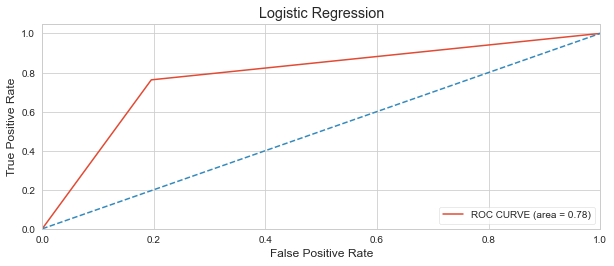




**    ~~~~~~~~~~~~~~~~~~~~ Decision tree Classifier ~~~~~~~~~~~~~~~~~~~~~~~~~~~    **


DecisionTreeClassifier()

Maximum accuracy score at random state 91 is 0.8817407440529422

Training score -  0.9571856555177964
Accuracy of model is - 0.8812153460919334
Cross Validation Score - 0.8822549633339296
ROC_AUC score - 0.8812153460919335


Confusion matrix :
 [[41276  3452]
 [ 7174 37554]]


Classification report :
               precision    recall  f1-score   support

           0       0.85      0.92      0.89     44728
           1       0.92      0.84      0.88     44728

    accuracy                           0.88     89456
   macro avg       0.88      0.88      0.88     89456
weighted avg       0.88      0.88      0.88     89456





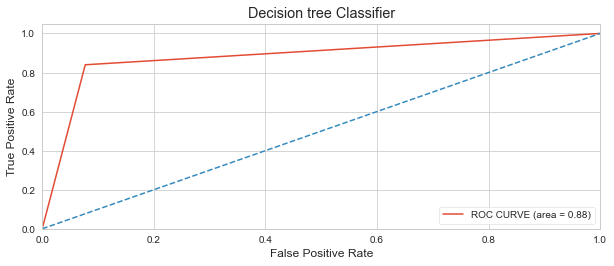




**    ~~~~~~~~~~~~~~~~~~~~ RandomForest Classifier ~~~~~~~~~~~~~~~~~~~~~~~~~~~    **


RandomForestClassifier()

Maximum accuracy score at random state 58 is 0.9037851010552674

Training score -  0.9570813211709295
Accuracy of model is - 0.9033603112144518
Cross Validation Score - 0.9047101368270435
ROC_AUC score - 0.9033603112144518


Confusion matrix :
 [[41336  3392]
 [ 5253 39475]]


Classification report :
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     44728
           1       0.92      0.88      0.90     44728

    accuracy                           0.90     89456
   macro avg       0.90      0.90      0.90     89456
weighted avg       0.90      0.90      0.90     89456





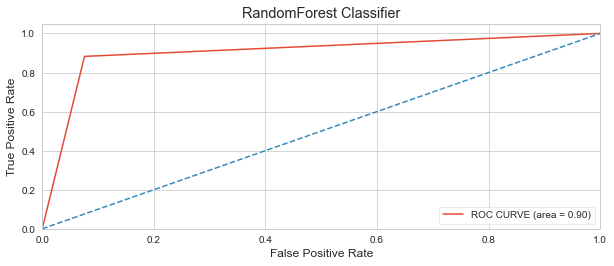




**    ~~~~~~~~~~~~~~~~~~~~ GradientBoostingClassifier ~~~~~~~~~~~~~~~~~~~~~~~~~~~    **


GradientBoostingClassifier()

Maximum accuracy score at random state 50 is 0.8539058307994992

Training score -  0.852806593930722
Accuracy of model is - 0.8539058307994992
Cross Validation Score - 0.8513794491146485
ROC_AUC score - 0.8539058307994992


Confusion matrix :
 [[39263  5465]
 [ 7604 37124]]


Classification report :
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     44728
           1       0.87      0.83      0.85     44728

    accuracy                           0.85     89456
   macro avg       0.85      0.85      0.85     89456
weighted avg       0.85      0.85      0.85     89456





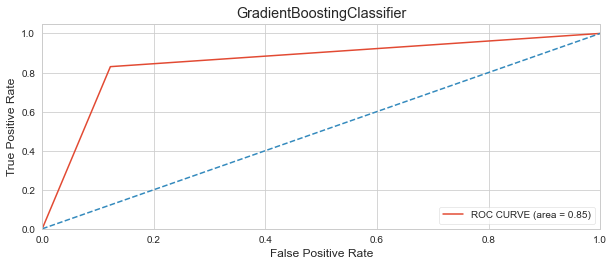




**    ~~~~~~~~~~~~~~~~~~~~ ExtraTrees Classifier ~~~~~~~~~~~~~~~~~~~~~~~~~~~    **


ExtraTreesClassifier()

Maximum accuracy score at random state 63 is 0.8971226077624754

Training score -  0.9570142490908007
Accuracy of model is - 0.8975921123233769
Cross Validation Score - 0.899006215346092
ROC_AUC score - 0.8975921123233768


Confusion matrix :
 [[41267  3461]
 [ 5700 39028]]


Classification report :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     44728
           1       0.92      0.87      0.89     44728

    accuracy                           0.90     89456
   macro avg       0.90      0.90      0.90     89456
weighted avg       0.90      0.90      0.90     89456





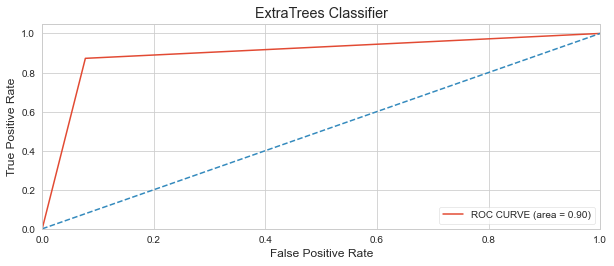

In [138]:
# Creating more list for stroing accuracy score,models,crossvalidation score etc,
Model=[]
score=[]
accuracy=[]
cross_score=[]
roc_score=[]

# creating loop for finding the best metric scores
for name,model in models:
    print("**    ~~~~~~~~~~~~~~~~~~~~",name,"~~~~~~~~~~~~~~~~~~~~~~~~~~~    **")
    Model.append(name)
    print("\n")
    print(model)
    print()
    
# Using randomstate function
    r=best_random_state(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r,stratify=y)
    model.fit(x_train,y_train)
 
    # for training score
    Score=model.score(x_train,y_train)
    print("Training score - ",Score)
    score.append(Score*100)
    y_pred=model.predict(x_test)
    
    # Accuracy score
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy of model is -",acc)
    accuracy.append(acc*100)
    
     # Cross validation score
    cv=cross_val_score(model,x,y,cv=8,scoring='accuracy').mean()
    print("Cross Validation Score -",cv)
    cross_score.append(cv*100)
    
     # Roc_auc curve
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    print("ROC_AUC score -",roc_auc)
    roc_score.append(roc_auc*100)
    
    # confusion matrix
    print("\n")
    print("Confusion matrix :\n",confusion_matrix(y_test,y_pred))
    print("\n")
          
    # Classification report
    print("Classification report :\n",classification_report(y_test,y_pred))
    print("\n")
          
    # Plotting roc_auc curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(fpr,tpr,label="ROC CURVE (area = %0.2f)" % roc_auc)
    plt.plot([0,1],[0,1],linestyle="--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    print("\n\n")
    

In [139]:
result = pd.DataFrame({'Model':Model,'Training Score':score,'Accuracy Score':accuracy,
                       'cross_val_score':cross_score,"ROC AUC score":roc_score})

In [140]:
# Table view of models result
result

,Model,Training Score,Accuracy Score,cross_val_score,ROC AUC score
0,Logistic Regression,78.081589,78.346897,78.104040,78.346897
1,Decision tree Classifier,95.718566,88.121535,88.225496,88.121535
2,RandomForest Classifier,95.708132,90.336031,90.471014,90.336031
3,GradientBoostingClassifier,85.280659,85.390583,85.137945,85.390583
4,ExtraTrees Classifier,95.701425,89.759211,89.900622,89.759211


###### From checking the result table and model's evaluation(classification report,confusion matrix),we observe that Randomforest classifier and ExtraTrees Classifier are giving better results. so we are using hyperparameter tunning on these algorithms and finding more better results.

## Using RandomizedSearchCV for hyperparaameter tunning

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
# Parameter for randomforest classifier hypertunning
parameters = {"n_estimators":[50,100,200,300]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7],'max_features': ['auto', 'sqrt', 'log2']}


In [145]:
# Setting up randomizedSearchCV for randomforest classifier hypertunning
random_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

random_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 42.4min finished


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 10, 12, 18],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=2)

In [146]:
# Best estimators for randomforest classfier
random_rf.best_estimator_

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=50)

In [147]:
random_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [148]:
# Best score
random_rf.best_score_

0.8951365289453288

In [149]:
# Using the best parameters in randomforest classifier
rf=RandomForestClassifier(n_estimators=50,
      min_samples_split =2,
      min_samples_leaf= 1,
      max_features= 'sqrt',
      max_depth = 25)

In [150]:
# finding best random state for higher accuracy
print("Best accuracy at randomm state: ",best_random_state(rf,x,y))

Maximum accuracy score at random state 75 is 0.8987658737256304

Best accuracy at randomm state:  75


In [151]:
# Importing other metrics 
from sklearn.metrics import precision_score,recall_score,f1_score

In [152]:
# finalising model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 75,test_size=0.25,stratify=y)
rf=RandomForestClassifier(n_estimators=50,
      min_samples_split =2,
      min_samples_leaf= 1,
      max_features= 'sqrt',
      max_depth = 25)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [155]:
# Accuracy score after hypertunning
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score is = {}".format(round(Accuracy*100,1)),"%")

Accuracy score is = 89.9 %


In [156]:
# Precision score after hypertunning
Precision=precision_score(y_test,y_pred)
print("Precision score is = {}".format(round(Precision*100,1)),"%")

Precision score is = 93.0 %


In [157]:
# Recall score after hypertunning
Recall=recall_score(y_test,y_pred)
print("Recall score is = {}".format(round(Recall*100,1)),"%")

Recall score is = 86.2 %


In [158]:
# f1 score after hypertunning
f1 =f1_score(y_test,y_pred)
print("f1 score is = {}".format(round(f1*100,1)),"%")

f1 score is = 89.5 %


ROC_AUC score - 0.8987435163655876


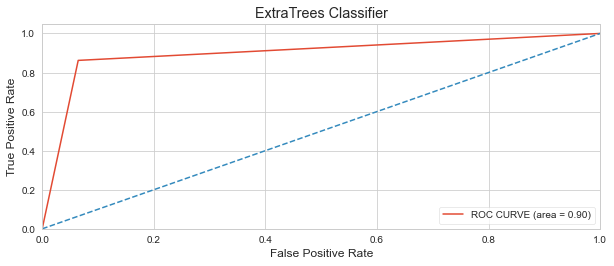

In [160]:
# Roc_auc curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print("ROC_AUC score -",roc_auc)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
plt.plot(fpr,tpr,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [161]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[41842  2886]
 [ 6172 38556]]


###### RandomForest is not giving much better results  ,giving result same as before hyperparameter tunning

In [162]:
# Parameters for ExtraTreesClassifier 
parameters={'n_estimators': [50,100,200,300],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None, 5, 10],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [163]:
random_et = RandomizedSearchCV(ExtraTreesClassifier(),param_distributions=parameters,n_iter=10,n_jobs=-1,cv=8,verbose=2)

random_et.fit(x_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 11.7min finished


RandomizedSearchCV(cv=8, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [4, 6],
                                        'n_estimators': [50, 100, 200, 300]},
                   verbose=2)

In [164]:
random_et.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [165]:
random_et.best_score_

0.8655651940618851

###### After Hyperparamter tunning  of both models we find that RandomForest Classifier is much better than all others. So we are using RandomForestClassifier. 

###### We can also test all other models but due to less efficiency of my system ,we have to compromise for this project.

## Predicting 

In [166]:
# Predicted values
table = pd.DataFrame(data=y_test)
table['Predicted']=y_pred
table

,label,Predicted
132221,1,1
180138,1,1
171624,1,1
72885,1,1
87770,1,1
...,...,...
272846,0,0
282221,0,0
159191,1,1
180640,1,1


In [167]:
# Saving the predicted values into csv file
predicted_values=pd.DataFrame(data=y_pred)
predicted_values.to_csv("micro_credit_project.csv")

## Saving model

In [180]:
import joblib
filename="micro_credit_project.obj"
joblib.dump(rf,filename)

['micro_credit_project.obj']

## Loading model

In [181]:
model=joblib.load(filename)
model

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=50)

##### Conclusion
###### The data present for our task was imbalanced in which 87% of User were non-defaulters while rest of them were defaulters. 


* 86.3% of Users consits of those who takes loan upto 1-6 times in 90 days.
   * While only 1% Users are those who doesn't take any loans. 


* 32% of New Users(upto 30 days) are defaulters.
* 46% defaulters are present among those who are spending averge daily amount below 10(Indonesian Rupiah).
    * While those who are spending high amount are having very less percentage of defaulters.

* 31% of zero or negative main account balance(over last 90 days) users are defaulters.

* 25.6% of users who  had not recharged main account more than a month ago are defaulters.
* only 7.5% of users are defaulters from those who have not recharged the data account from a long time.
* 42% of Users who are having low amount(<=500Indonesian Rupiah) of recharge are defaulters.
* 43% of low amount(<=500Indonesian Rupiah) of recharge in main account are defaulters.
* 43% are defaulters among those who have no recharge in last 90 days, .
   
* Those with high recharge frequency(greater than 5) of data account are having higher percentage of defaulters. Almost 16%  are defaulters.
* Those who take loans less than 10 times in 90 days are among with highest defaulter's percentage.While as the number of times loans taken by users increases, defaulter's percentage also decreases.
* Almost 14% of users who take loans of 5 Indonesian Rupiah are defaulters.
   * While the defaulters percentage is less where users take loan of 10 Indonesian Rupiah.
   
###### We make Machine Learning Model after balancing the dataset and find out that our model prediction is giving us quite better results as all the metrics of our selected model gives almost same accuracy. 
###### We have used RandomForest Classifier Machine Learning Algorithm with an accuracy of 90%.